# Online Shopping Intentions

## Introduction

This project tracks the sessions of visitors to a popular e-commerce website, including visitor location, pages visited, and duration of visits. The dependent variable of the project is whether the visit resulted in revenue.

Abstract: Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

## Goals of the project

The goal of this project is to gain insights into customer behavior on e-Navigator's website as it relates to purchases. In doing so, we can pinpoint which aspects of our website drive our customers to make purchases, and which aspects deter customers from purchasing.

In addition, we can segment our customers via clustering in order to understand our customer base better.

We will also create a machine learning classifier in order to predict whether a customer will generate revenue based on their behavior. Such a predictor can pinpoint

## Dataset Info

#### Citation:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

#### Source:

Source 
1. C. Okan Sakar 
Department of Computer Engineering, Faculty of 
Engineering and Natural Sciences, Bahcesehir University, 
34349 Besiktas, Istanbul, Turkey 

2. Yomi Kastro 
Inveon Information Technologies Consultancy and Trade, 
34335 Istanbul, Turkey


#### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.


#### Attribute Information:

The dataset consists of **10 numerical** and **8 categorical** attributes.

The **'Revenue'** attribute can be used as the class label. 

**"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

-  The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

-  The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

-  The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes **operating system, browser, region, traffic type, visitor type** as returning or new visitor, a Boolean value indicating whether the date of the visit is **weekend**, and **month** of the year.

The label for this dataset is single-variate CATEGORICAL ('Revenue' is boolean True/False)

# Importing the Data

In [1489]:
# Common imports
import numpy as np
import pandas as pd
import scipy
import os
from numpy import median

# Timing models
import math, time, datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Warnings
import warnings
# to change warnings in functions:
#warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
# to reset warnings:
#warnings.resetwarnings()

# Where to save the figures
PROJECT_ROOT_DIR = '/Users/Gregs_Computer/Documents/Studies/Data_Science/Projects/Online Shopping Intention (UCI)/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'Images')
os.makedirs(IMAGES_PATH, exist_ok=True)

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, 'images', fig_id)

def save_fig(fig_id, tight_layout=True):
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + '.png', format='png', dpi=300)


In [2]:
# Load the data
shopping_original = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, 'Data', 'online_shoppers_intention.csv'))

# General Preliminary Observations

In [3]:
shopping_original.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
shopping_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### Missing Values

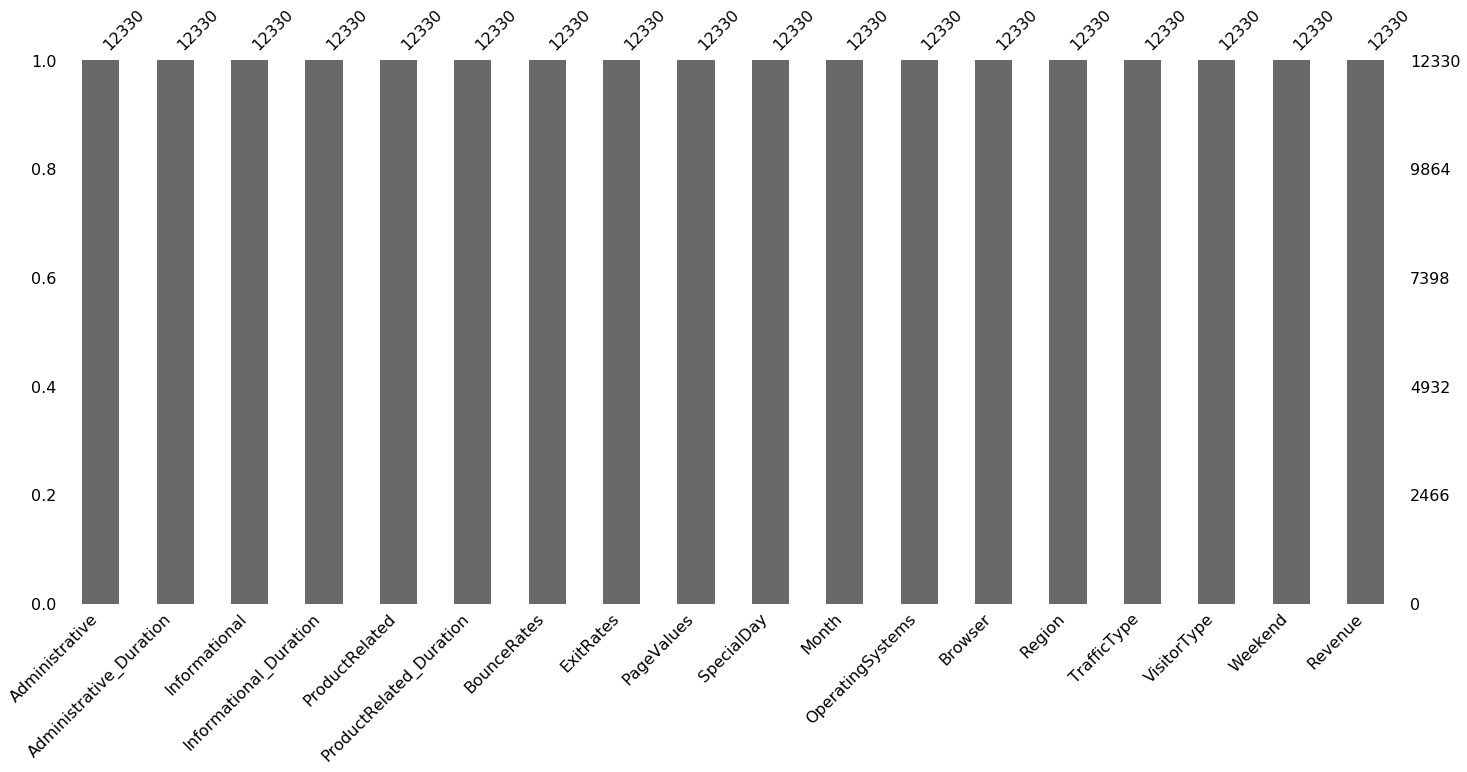

In [7]:
# Check for missing values
import missingno
missingno.bar(shopping_original)
plt.show()

We can see there are no missing values.

# Create Train and Test Set

In [1218]:
from sklearn.model_selection import train_test_split

shopping_train, shopping_test = train_test_split(shopping_original, test_size=0.2, random_state=42)

In [1219]:
shopping_train.head()

Administrative  Administrative_Duration  Informational  \
1785                0                      0.0              0   
10407               2                     14.0              0   
286                 0                      0.0              0   
6520                5                     49.2              4   
12251               0                      0.0              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1785                      0.0               7                95.000000   
10407                     0.0              81              1441.910588   
286                       0.0               1                 0.000000   
6520                    379.0               5                74.600000   
12251                     5.0               9               279.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1785      0.014286   0.061905    0.000000         0.0   Mar                 2   
10407     0.002469   0.013933    2.769599         0.0   Nov                 2   
286       0.200000   0.200000    0.000000         0.0   Mar                 2   
6520      0.000000   0.018182    8.326728         0.0   Sep                 2   
12251     0.040000   0.041667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1785         6       1            1  Returning_Visitor    False    False  
10407        2       3            2  Returning_Visitor    False    False  
286          2       1            1  Returning_Visitor    False    False  
6520         2       8            2        New_Visitor    False    False  
12251        2       7            8        New_Visitor     True    False

# Exploratory Data Analysis

In [1381]:
# Create a copy of training set to explore with
shopping_explore = shopping_train.copy(deep=True)

In [14]:
# List of categorical features
cat_attribs = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'SpecialDay']

# List of numerical features
num_attribs = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Numerical Features

Functions for numerical features.

In [114]:
def preliminaries(df, column, values=True):
    '''
    Prints the dtype, missing values, and value counts of a series.
    
    Args:
    df -- dataframe
    column -- feature column
    values -- display value_counts
    '''
    # Dtype
    print('Dtype: ', df[column].dtype)
    
    # Missing Values
    df_length = len(df)
    total_column_values = df[column].value_counts().sum()
    missing_vals = df_length - total_column_values
    print('Missing Values: ', missing_vals)
    
    # Value counts
    if values:
        print(df[column].value_counts())

In [177]:
# Function for summary statistics of each feature
def sum_stats(df_dot_column):
    '''
    Prints basic summary statistics of a given feature:
    nobs, median, mode, mean, std, minmax, 25%, 50%, 75%, skewness
    
    Args:
    df_dot_column -- Pandas series of given feature
    '''
    sum_stats = scipy.stats.describe(df_dot_column)
    pd_stats = df_dot_column.describe()
    print('nobs:', sum_stats[0])
    print('median:', df_dot_column.median())
    print('mode:', scipy.stats.mode(df_dot_column)[0])
    print('mean:', sum_stats[2])
    print('std:', np.sqrt(sum_stats[3]))
    print('minmax:', sum_stats[1])
    print('25%', pd_stats[4])
    print('50%', pd_stats[5])
    print('75%', pd_stats[6])
    print('skewness:', sum_stats[4])
    # Outliers
    x = df_dot_column
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print('outliers: (' + floor.astype('str') + ',', ceiling.astype('str') + ')')

In [15]:
# Summary statistics for numerical features
shopping_explore[num_attribs].describe()

Administrative  Administrative_Duration  Informational  \
count     9864.000000              9864.000000    9864.000000   
mean         2.302818                81.107226       0.503447   
std          3.297117               177.511054       1.266877   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                92.000000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             9864.000000     9864.000000              9864.000000   
mean                34.062159       31.736922              1197.331019   
std                138.941112       44.562956              1922.835536   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               186.000000   
50%                  0.000000       18.000000               602.541667   
75%                  0.000000       37.000000              1471.189584   
max               2549.375000      705.000000             63973.522230   

       BounceRates    ExitRates   PageValues   SpecialDay  
count  9864.000000  9864.000000  9864.000000  9864.000000  
mean      0.021659     0.042613     5.832987     0.061071  
std       0.047469     0.047839    18.483546     0.198057  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.014286     0.000000     0.000000  
50%       0.002961     0.025000     0.000000     0.000000  
75%       0.016667     0.050000     0.000000     0.000000  
max       0.200000     0.200000   361.763742     1.000000

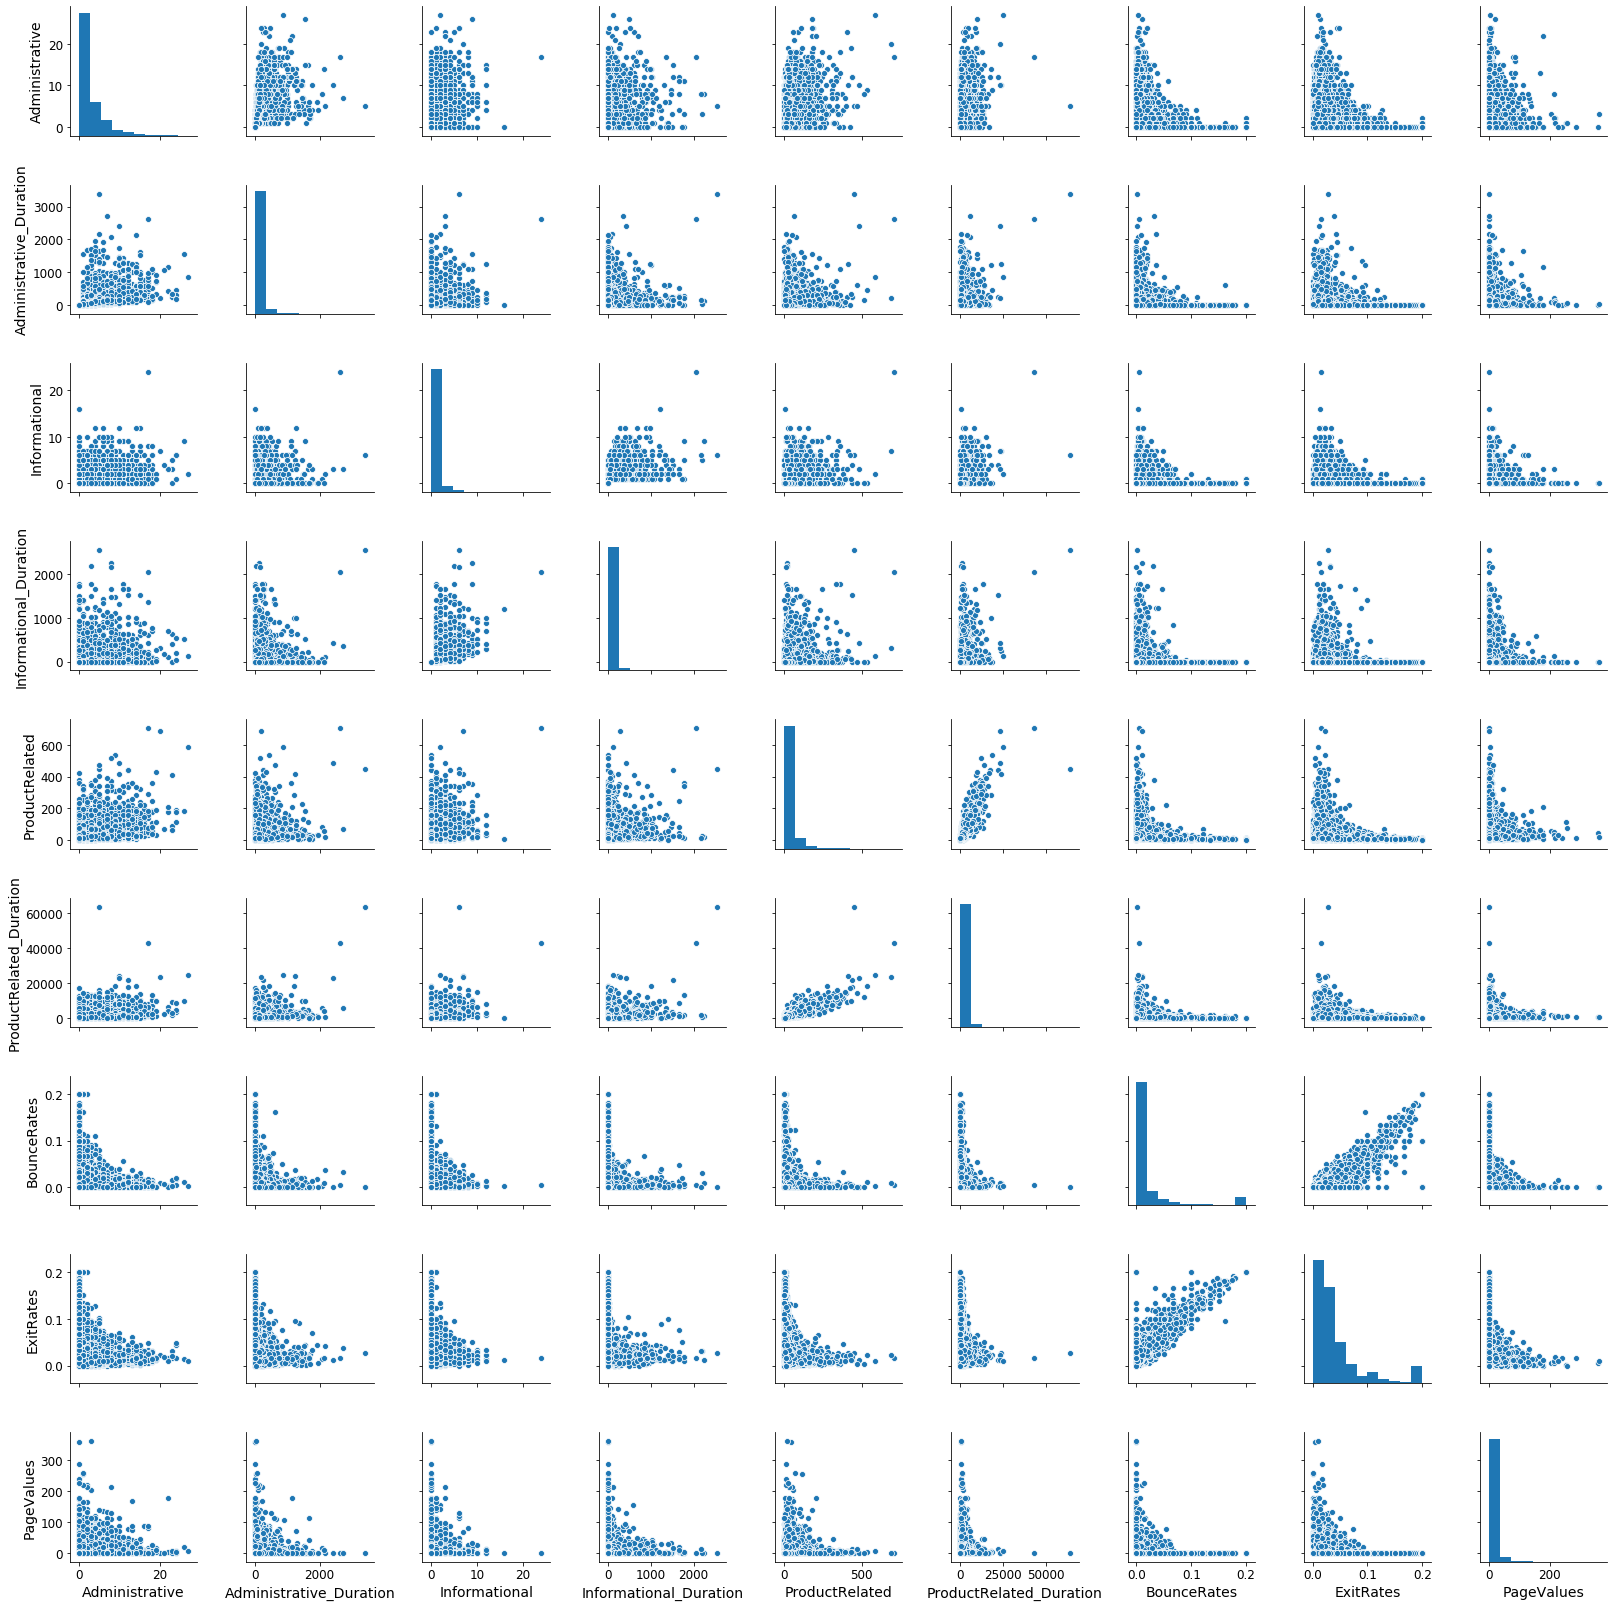

In [1421]:
# Pairplots
sns.pairplot(shopping_explore[num_attribs])
plt.show()

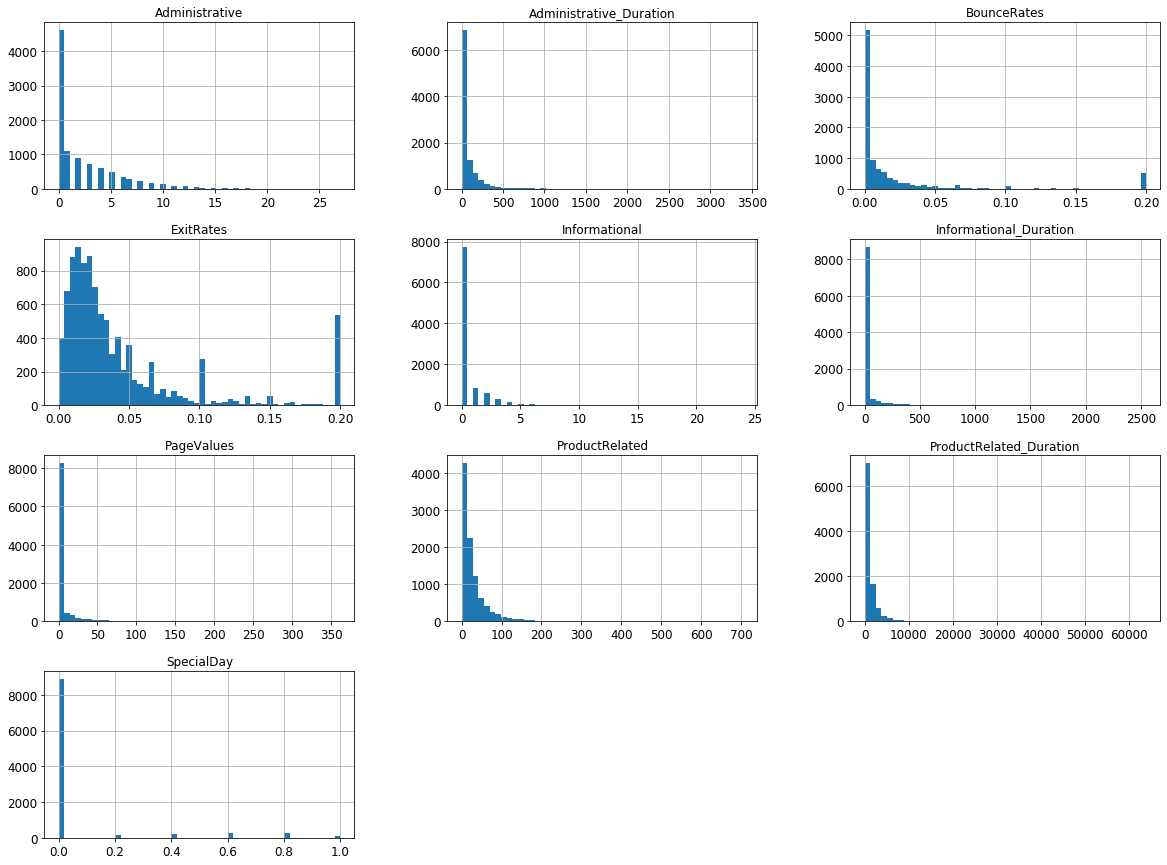

In [17]:
# Plot histograms of each numerical variable
shopping_explore[num_attribs].hist(bins=50, figsize=(20,15))
plt.show()

## Feature: Revenue (Binary Categorical)

In [436]:
preliminaries(shopping_explore, 'Revenue')

Dtype:  bool
Missing Values:  0
False    8367
True     1497
Name: Revenue, dtype: int64


In [437]:
sum_stats(shopping_explore.Revenue.astype('int'))

nobs: 9864
median: 0.0
mode: [0]
mean: 0.1517639902676399
std: 0.35881016360460866
minmax: (0, 1)
25% 0.0
50% 0.0
75% 0.0
skewness: 1.941158296308672
outliers: (0.0, 0.0)


In [449]:
# Percentage of all visitors that generate revenue
ratio = np.round((len(shopping_explore[shopping_explore.Revenue == 1]) / len(shopping_explore.Revenue)) * 100,2)
print(ratio.astype('str')+'%')

15.18%


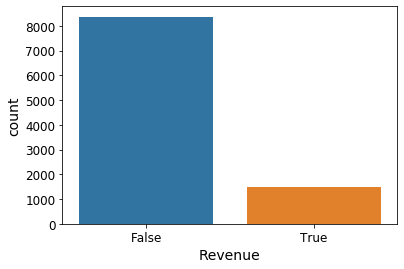

In [439]:
sns.countplot(shopping_explore.Revenue)
plt.show()

**15%** of site visits generate revenue.

## Feature: Administrative (Discrete)

In [116]:
preliminaries(shopping_explore, 'Administrative', values=False)

Dtype:  int64
Missing Values:  0


In [178]:
sum_stats(shopping_explore.Administrative)

nobs: 9864
median: 1.0
mode: [0]
mean: 2.302818329278183
std: 3.297117013279085
minmax: (0, 27)
25% 0.0
50% 1.0
75% 4.0
skewness: 1.9667242548145996
outliers: (-6.0, 10.0)


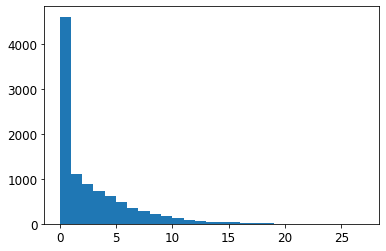

In [120]:
plt.hist(shopping_explore.Administrative, bins=27)
plt.show()

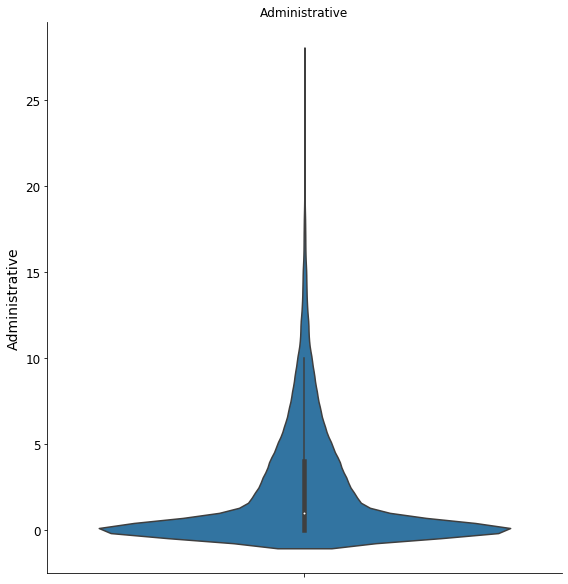

In [1422]:
sns.catplot(y='Administrative', data=shopping_explore, kind='violin', height=8)
plt.title('Administrative')
plt.show()

Most visitors visit less than 5 Administrative pages, with a mode at 0.

In [493]:
# Statistics for NON-revenue-generating customers' Administrative_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==0].Administrative)

nobs: 8367
median: 0.0
mode: [0]
mean: 2.125971076849528
std: 3.2072642432469003
minmax: (0, 27)
25% 0.0
50% 0.0
75% 3.0
skewness: 2.099921703289989
outliers: (-4.5, 7.5)


In [492]:
# Statistics for revenue-generating customers' Administrative_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==1].Administrative)

nobs: 1497
median: 2.0
mode: [0]
mean: 3.29124916499666
std: 3.6047183284292554
minmax: (0, 26)
25% 0.0
50% 2.0
75% 5.0
skewness: 1.460300151414002
outliers: (-7.5, 12.5)


The modes for both revenue and non-revenue generating customers is 0.

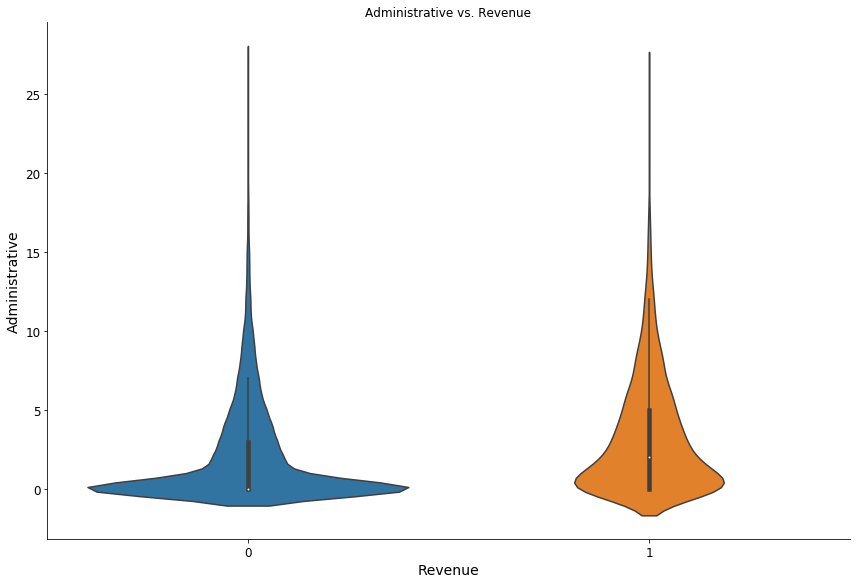

In [1423]:
# Violin plots of Administrative vs. Revenue
fig = sns.catplot(y='Administrative', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('Administrative vs. Revenue')
plt.show()

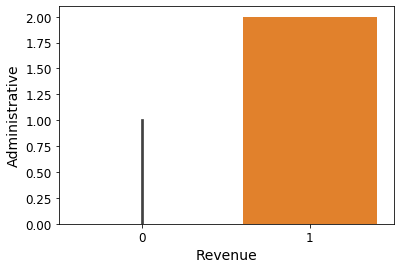

In [1502]:
sns.barplot(y='Administrative', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

For visitors generating revenue, more Administrative pages are viewed and the spread is wider as pages increase, as compared to a strong mode at 0 for non-revenue visitors.

## Feature: Administrative_Duration (Numerical)

In [188]:
preliminaries(shopping_explore, 'Administrative_Duration', values=False)

Dtype:  float64
Missing Values:  0


In [179]:
sum_stats(shopping_explore.Administrative_Duration)

nobs: 9864
median: 8.0
mode: [0.]
mean: 81.10722578119547
std: 177.5110540951111
minmax: (0.0, 3398.75)
25% 0.0
50% 8.0
75% 92.0
skewness: 5.593837705915101
outliers: (-138.0, 230.0)


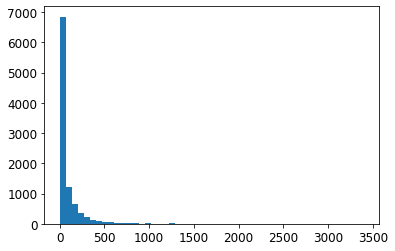

In [475]:
plt.hist(shopping_explore.Administrative_Duration, bins=50)
plt.show()

Most Administrative_Durations are near 0 (mode), with a median of 8. Skews right.

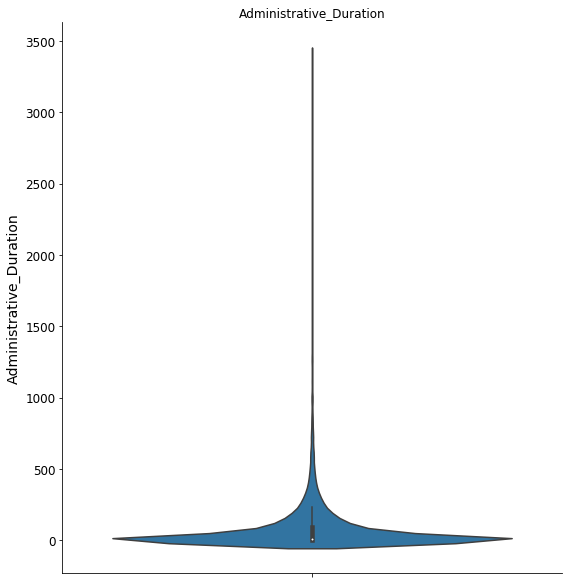

In [1424]:
sns.catplot(y='Administrative_Duration', data=shopping_explore, kind='violin', height=8)
plt.title('Administrative_Duration')
plt.show()

In [453]:
# Statistics for NON-revenue-generating customers' Administrative_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==0].Administrative_Duration)

nobs: 8367
median: 0.0
mode: [0.]
mean: 74.4430985407428
std: 172.60679350444678
minmax: (0.0, 3398.75)
25% 0.0
50% 0.0
75% 83.0
skewness: 6.0962381099527745
outliers: (-124.5, 207.5)


In [452]:
# Statistics for revenue-generating customers' Administrative_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==1].Administrative_Duration)

nobs: 1497
median: 51.4
mode: [0.]
mean: 118.35422151991783
std: 198.7381687400085
minmax: (0.0, 2086.75)
25% 0.0
50% 51.4
75% 147.5
skewness: 3.8020569745566553
outliers: (-221.25, 368.75)


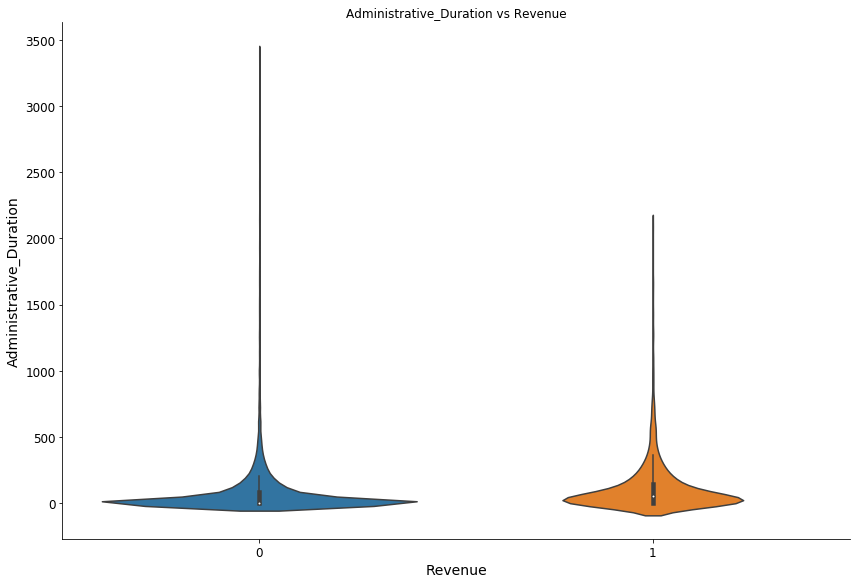

In [1425]:
# Administrative_Duration by Revenue
fig = sns.catplot(y='Administrative_Duration', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('Administrative_Duration vs Revenue')
plt.show()

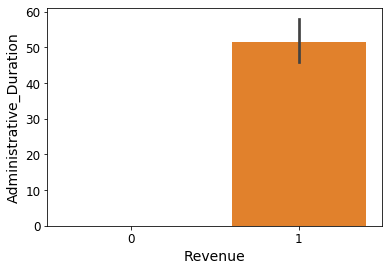

In [1501]:
sns.barplot(y='Administrative_Duration', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

Revenue-generating visitors spend more time on Administrative pages with a median of 8 vs. a median of 0 for non-revenue-generating visitors. The spread is larger as Administrative_Duration increases as well.

## Feature: Informational (Discrete)

In [204]:
preliminaries(shopping_explore, 'Informational', values=True)

Dtype:  int64
Missing Values:  0
0     7753
1      835
2      589
3      307
4      172
5       80
6       61
7       28
8       13
9       12
10       7
12       5
24       1
16       1
Name: Informational, dtype: int64


In [205]:
sum_stats(shopping_explore.Informational)

nobs: 9864
median: 0.0
mode: [0]
mean: 0.5034468775344688
std: 1.2668766546480548
minmax: (0, 24)
25% 0.0
50% 0.0
75% 0.0
skewness: 4.060180989094298
outliers: (0.0, 0.0)


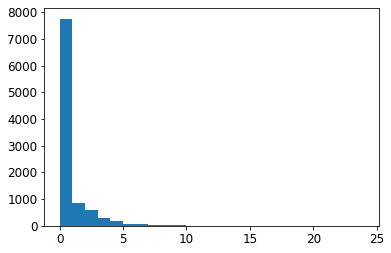

In [207]:
plt.hist(shopping_explore.Informational, bins=24)
plt.show()

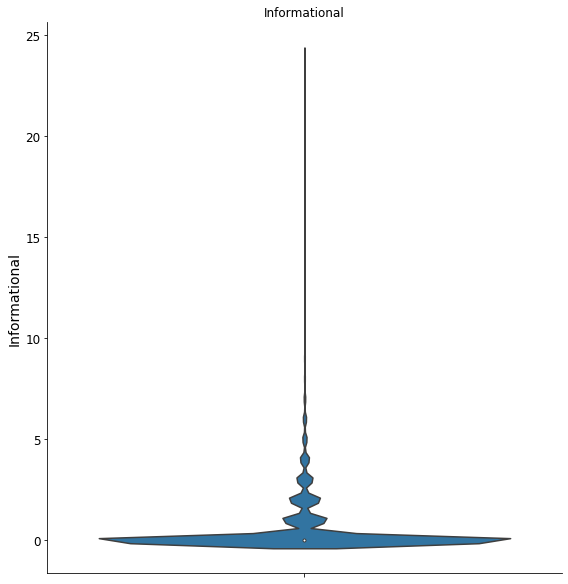

In [1426]:
sns.catplot(y='Informational', data=shopping_explore, kind='violin', height=8)
plt.title('Informational')
plt.show()

In [496]:
# Statistics for NON-revenue-generating customers' Administrative_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==0].Informational)

nobs: 8367
median: 0.0
mode: [0]
mean: 0.4518943468387714
std: 1.2049378184696955
minmax: (0, 24)
25% 0.0
50% 0.0
75% 0.0
skewness: 4.452837286684516
outliers: (0.0, 0.0)


In [497]:
# Statistics for revenue-generating customers' Administrative_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==1].Informational)

nobs: 1497
median: 0.0
mode: [0]
mean: 0.7915831663326653
std: 1.5376239456791976
minmax: (0, 12)
25% 0.0
50% 0.0
75% 1.0
skewness: 2.766566950095977
outliers: (-1.5, 2.5)


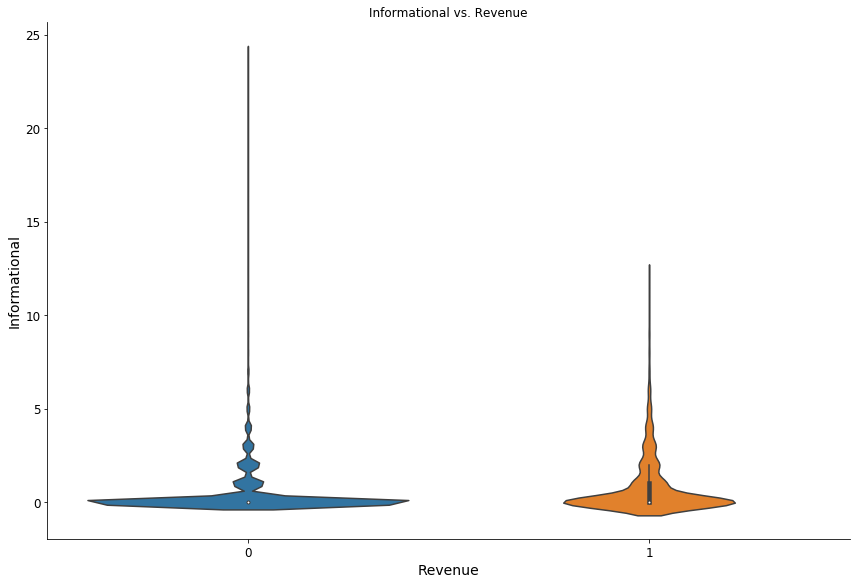

In [1427]:
fig = sns.catplot(y='Informational', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('Informational vs. Revenue')
plt.show()

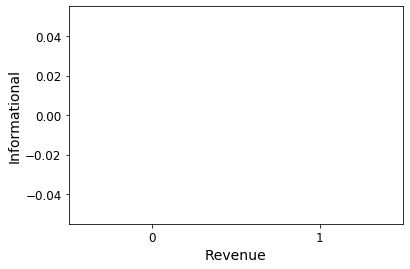

In [1498]:
sns.barplot(y='Informational', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

In terms of median pages visited, Informational has no difference between revenue and non-revenue generating visits.

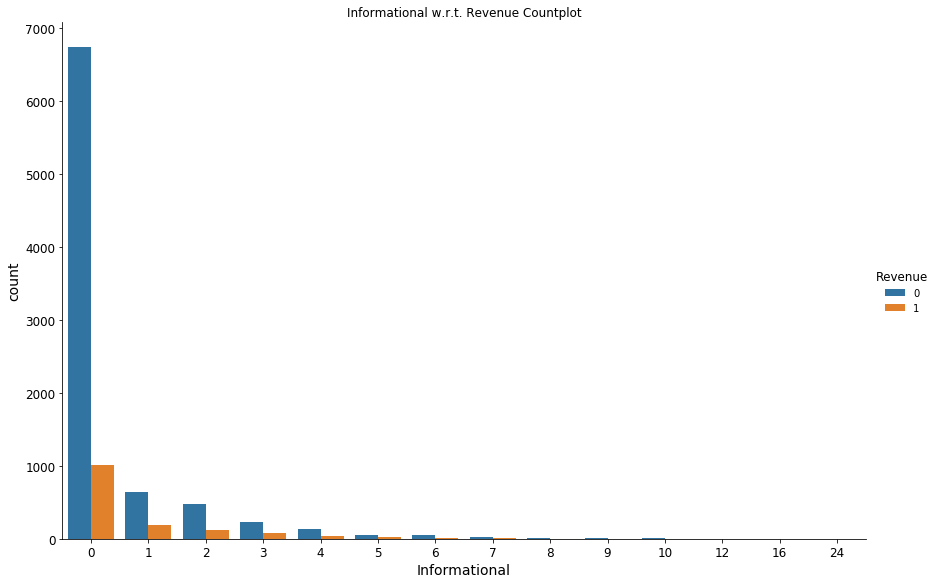

In [1429]:
fig = sns.catplot(x='Informational', hue='Revenue', data=shopping_explore, kind='count', height=8, aspect=1.5)
plt.title('Informational w.r.t. Revenue Countplot')
plt.show()

Both non-revenue and revenue generating visitors have a mode at 0 for Informational pages, and revenue is quite low for visits to informational pages--in fact, most revenue comes from visits where 0 informational pages are seen. And not many visits in total are visiting informational pages.

A likely reason for this behavior could be that visitors are not yet ready to buy and are simply gathering information.

It would be interesting to look further into whether most informational pages are visited by first-time visitors.

## Feature: Informational_Duration (Numerical)

In [221]:
preliminaries(shopping_explore, 'Informational_Duration', values=False)

Dtype:  float64
Missing Values:  0


In [228]:
sum_stats(shopping_explore.Informational_Duration)

nobs: 9864
median: 0.0
mode: [0.]
mean: 34.06215892680099
std: 138.94111229037478
minmax: (0.0, 2549.375)
25% 0.0
50% 0.0
75% 0.0
skewness: 7.648696203905328
outliers: (0.0, 0.0)


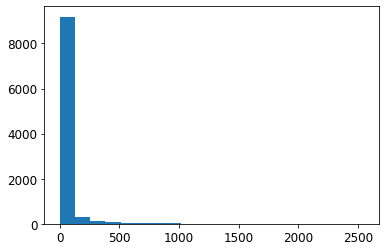

In [227]:
plt.hist(shopping_explore.Informational_Duration, bins=20)
plt.show()

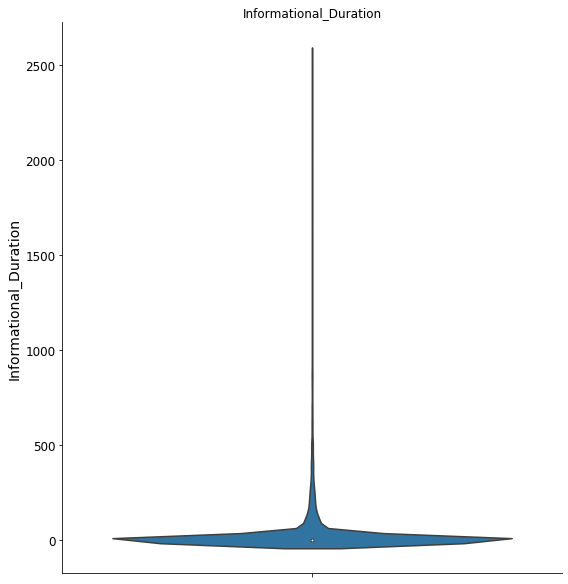

In [1430]:
sns.catplot(y='Informational_Duration', data=shopping_explore, kind='violin', height=8)
plt.title('Informational_Duration')
plt.show()

In [498]:
# Statistics for NON-revenue-generating customers' Informational_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==0].Informational_Duration)

nobs: 8367
median: 0.0
mode: [0.]
mean: 30.238015592339906
std: 133.67806607245015
minmax: (0.0, 2549.375)
25% 0.0
50% 0.0
75% 0.0
skewness: 8.388852577281995
outliers: (0.0, 0.0)


In [499]:
# Statistics for revenue-generating customers' Informational_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==1].Informational_Duration)

nobs: 1497
median: 0.0
mode: [0.]
mean: 55.435978084740825
std: 163.714372350519
minmax: (0.0, 1767.6666670000002)
25% 0.0
50% 0.0
75% 19.0
skewness: 5.154397637439836
outliers: (-28.5, 47.5)


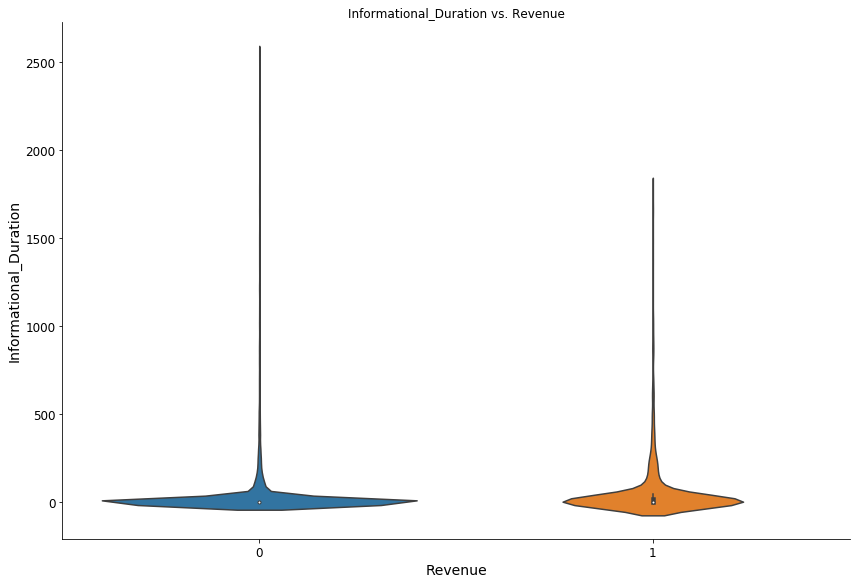

In [1431]:
fig = sns.catplot(y='Informational_Duration', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('Informational_Duration vs. Revenue')
plt.show()

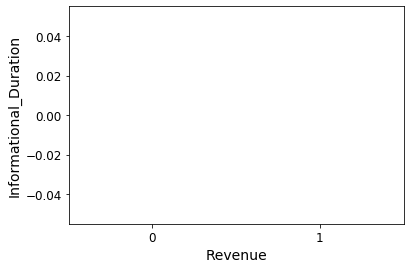

In [1494]:
sns.barplot(y='Informational_Duration', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

Both revenue and non-revenue visitors have an Informational_Duration median and mode at 0, but there is a larger spread and mean for revenue visitors.

## Feature: ProductRelated (Discrete)

In [243]:
preliminaries(shopping_explore, 'ProductRelated', values=False)

Dtype:  int64
Missing Values:  0


In [244]:
sum_stats(shopping_explore.ProductRelated)

nobs: 9864
median: 18.0
mode: [1]
mean: 31.736922141119223
std: 44.56295628881054
minmax: (0, 705)
25% 7.0
50% 18.0
75% 37.0
skewness: 4.386521512515544
outliers: (-38.0, 82.0)


ProductRelated has a mode at 1 page with a much larger spread than Administrative and Informational.

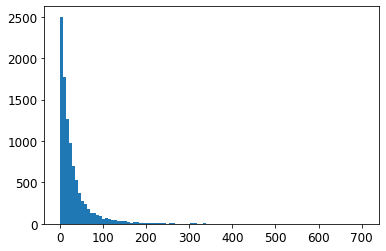

In [250]:
plt.hist(shopping_explore.ProductRelated, bins=100)
plt.show()

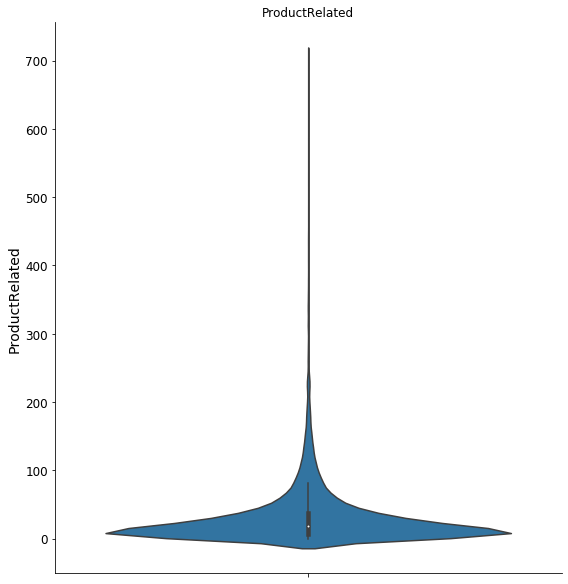

In [1433]:
sns.catplot(y='ProductRelated', data=shopping_explore, kind='violin', height=8)
plt.title('ProductRelated')
plt.show()

In [500]:
# Statistics for NON-revenue-generating customers' ProductRelated
sum_stats(shopping_explore[shopping_explore.Revenue==0].ProductRelated)

nobs: 8367
median: 16.0
mode: [1]
mean: 28.99796820843791
std: 41.66038851245618
minmax: (0, 705)
25% 7.0
50% 16.0
75% 35.0
skewness: 4.816329753285786
outliers: (-35.0, 77.0)


In [501]:
# Statistics for revenue-generating customers' ProductRelated
sum_stats(shopping_explore[shopping_explore.Revenue==1].ProductRelated)

nobs: 1497
median: 28.0
mode: [13]
mean: 47.045424181696724
std: 55.76994446220961
minmax: (0, 534)
25% 15.0
50% 28.0
75% 56.0
skewness: 3.144332395013835
outliers: (-46.5, 117.5)


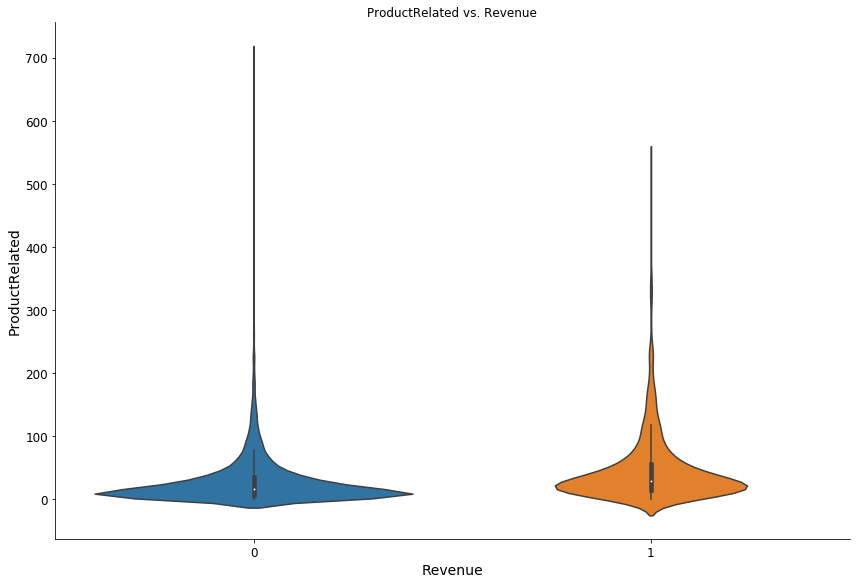

In [1434]:
fig = sns.catplot(y='ProductRelated', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('ProductRelated vs. Revenue')
plt.show()

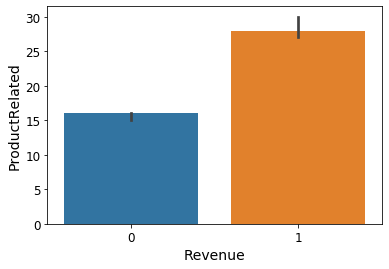

In [1490]:
sns.barplot(y='ProductRelated', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

ProductRelated pages are clearly much more popular, as Administrative and Informational pages both had modes at 0 for both revenue and non-revenue visitors, while ProductRelated has a mode of 1 page for non-revenue and 13 pages for revenue visitors. Revenue visitors has a larger spread, median, and mean.

## Feature: ProductRelated_Duration (Numerical)

In [263]:
preliminaries(shopping_explore, 'ProductRelated_Duration', values=False)

Dtype:  float64
Missing Values:  0


In [523]:
# View highest 15 ProductRelated_Duration
shopping_explore.ProductRelated_Duration.value_counts().sort_index(ascending=False).head(15)

63973.52223    1
43171.23338    1
24844.15620    1
23888.81000    1
23342.08205    1
23050.10414    1
21857.04648    1
18504.12621    1
18171.79454    1
17550.58486    1
17086.23424    1
16138.29080    1
16093.30941    1
15025.23302    1
14988.59151    1
Name: ProductRelated_Duration, dtype: int64

In [524]:
sum_stats(shopping_explore.ProductRelated_Duration)

nobs: 9864
median: 602.54166665
mode: [0.]
mean: 1197.331019067705
std: 1922.8355360089727
minmax: (0.0, 63973.522229999995)
25% 186.0
50% 602.54166665
75% 1471.1895835
skewness: 7.724746601450558
outliers: (-1741.78437525, 3398.97395875)


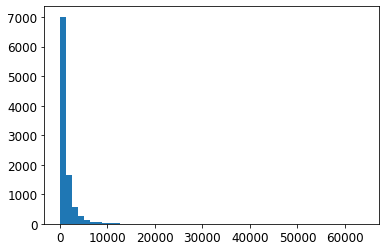

In [262]:
plt.hist(shopping_explore.ProductRelated_Duration, bins=50)
plt.show()

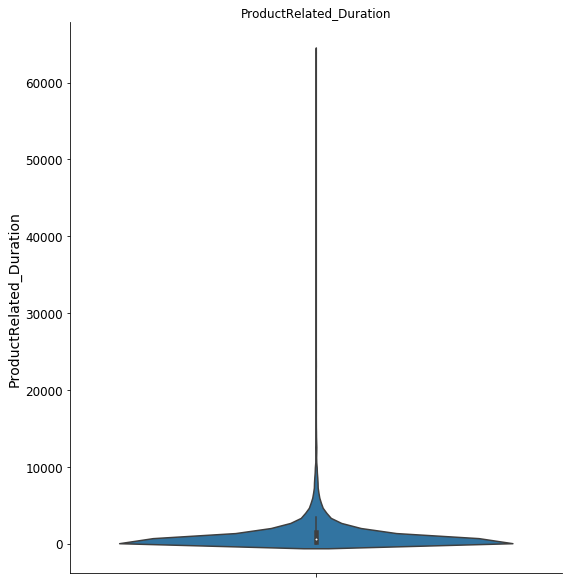

In [1435]:
sns.catplot(y='ProductRelated_Duration', data=shopping_explore, kind='violin', height=8)
plt.title('ProductRelated_Duration')
plt.show()

ProductRelated has a much larger distribution than Administrative and Informational, although it still has a mode of 0. The distribution has high outliers heavily skewing the distribution.

In [525]:
# Statistics for NON-revenue-generating customers' ProductRelated_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==0].ProductRelated_Duration)

nobs: 8367
median: 517.66
mode: [0.]
mean: 1083.6057356306385
std: 1848.8957386121037
minmax: (0.0, 63973.522229999995)
25% 154.0
50% 517.66
75% 1344.375
skewness: 9.313446343603474
outliers: (-1631.5625, 3129.9375)


In [526]:
# Statistics for revenue-generating customers' ProductRelated_Duration
sum_stats(shopping_explore[shopping_explore.Revenue==1].ProductRelated_Duration)

nobs: 1497
median: 1100.475
mode: [0.]
mean: 1832.9619118652572
std: 2186.9401086869843
minmax: (0.0, 18504.12621)
25% 547.4007937000001
50% 1100.475
75% 2235.8280839999998
skewness: 2.8730389439711277
outliers: (-1985.240141749999, 4768.469019449999)


Revenue visitors' median is twice as long as non-revenue visitors on ProductRelated pages. However, both have a mode at 0. Much of the high-level outliers come from non-revenue visitors, likely because they left the screen on a product and did not make the purchase.

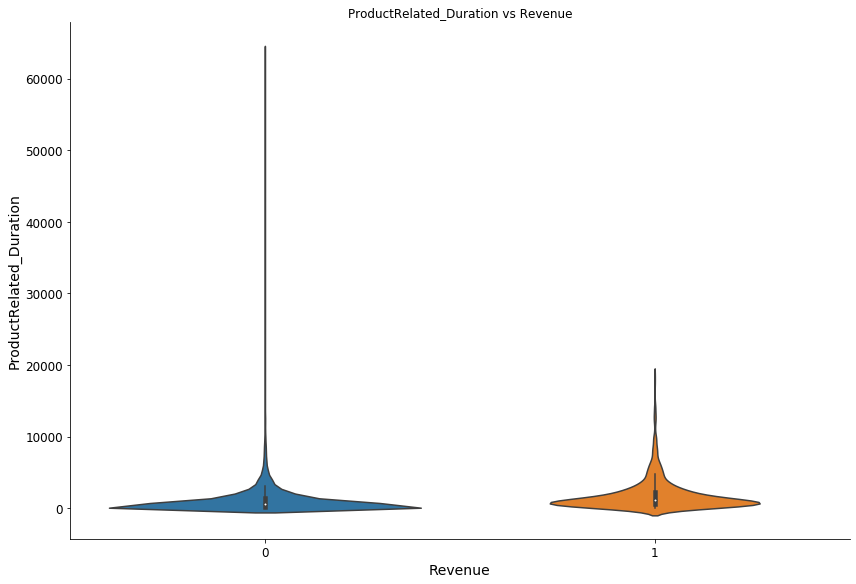

In [1436]:
fig = sns.catplot(y='ProductRelated_Duration', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('ProductRelated_Duration vs Revenue')
plt.show()

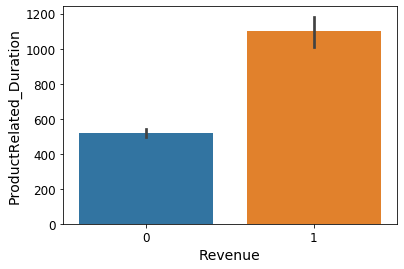

In [1488]:
sns.barplot(y='ProductRelated_Duration', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

## Feature: BounceRates (Numerical)

In [269]:
preliminaries(shopping_explore, 'BounceRates', values=False)

Dtype:  float64
Missing Values:  0


In [1510]:
sum_stats(shopping_explore[shopping_explore.Revenue==1].BounceRates)

nobs: 1497
median: 0.0
mode: [0.]
mean: 0.005078540554442217
std: 0.012965582165072449
minmax: (0.0, 0.2)
25% 0.0
50% 0.0
75% 0.005998168000000001
skewness: 8.51458830166167
outliers: (-0.008997252, 0.014995420000000002)


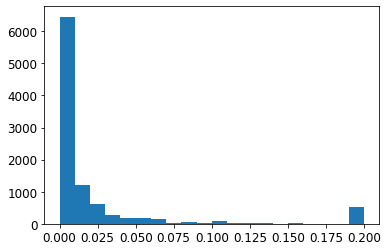

In [266]:
plt.hist(shopping_explore.BounceRates, bins=20)
plt.show()

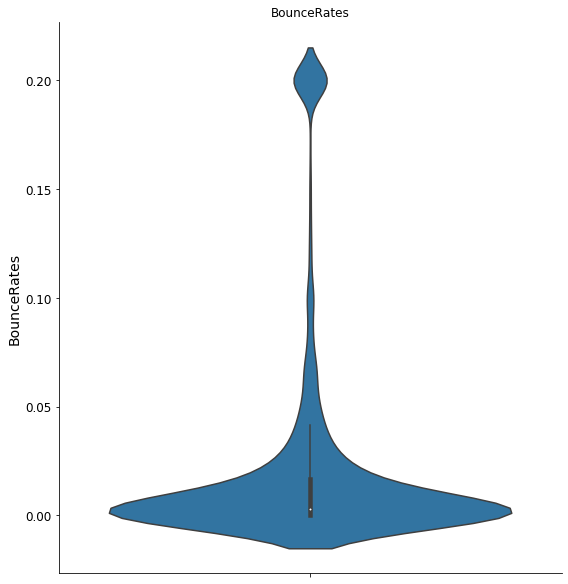

In [1437]:
sns.catplot(y='BounceRates', data=shopping_explore, kind='violin', height=8)
plt.title('BounceRates')
plt.show()

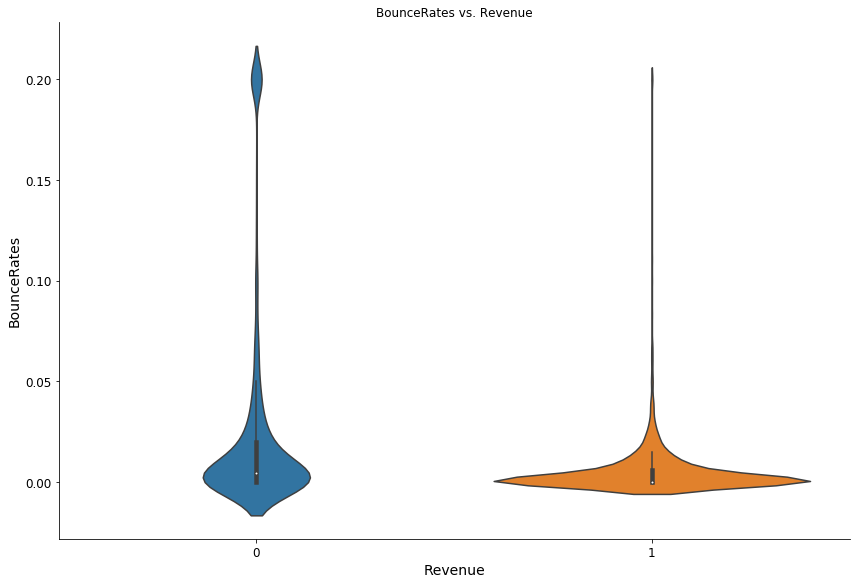

In [1438]:
fig = sns.catplot(y='BounceRates', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('BounceRates vs. Revenue')
plt.show()

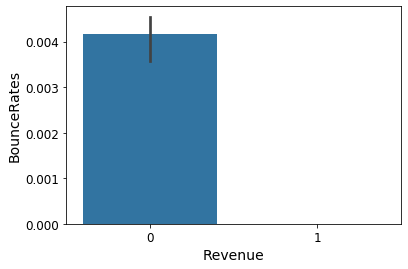

In [1505]:
# Barplot
sns.barplot(y='BounceRates', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

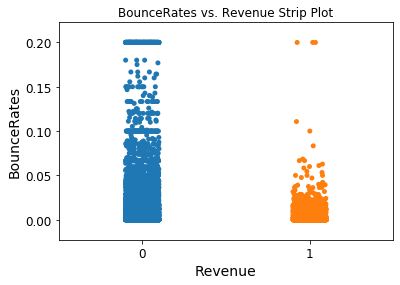

In [1439]:
sns.stripplot(x='Revenue', y='BounceRates', data=shopping_explore)
plt.title('BounceRates vs. Revenue Strip Plot')
plt.show()

## Feature: ExitRates (Numerical)

In [276]:
preliminaries(shopping_explore, 'ExitRates', values=False)

Dtype:  float64
Missing Values:  0


In [272]:
sum_stats(shopping_explore.ExitRates)

nobs: 9864
median: 0.025
mode: [0.2]
mean: 0.04261334683404299
std: 0.04783850779761271
minmax: (0.0, 0.2)
25% 0.014285714
50% 0.025
75% 0.05
skewness: 2.168885504185726
outliers: (-0.039285715000000006, 0.103571429)


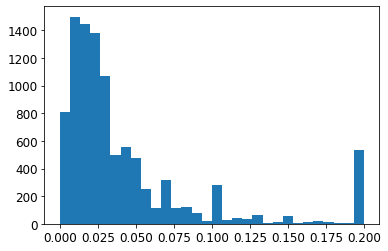

In [278]:
plt.hist(shopping_explore.ExitRates, bins=30)
plt.show()

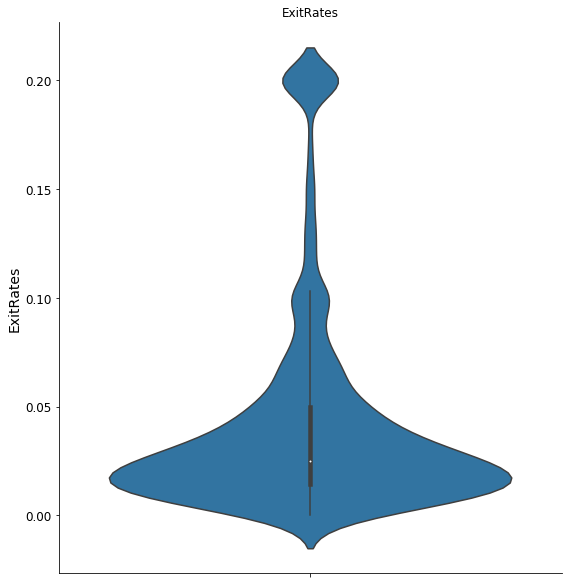

In [1440]:
sns.catplot(y='ExitRates', data=shopping_explore, kind='violin', height=8)
plt.title('ExitRates')
plt.show()

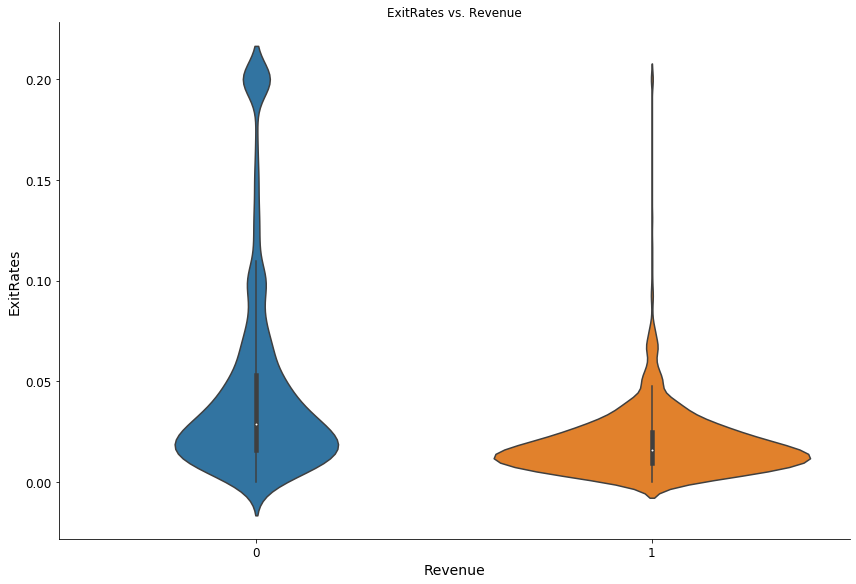

In [1441]:
fig = sns.catplot(y='ExitRates', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('ExitRates vs. Revenue')
plt.show()

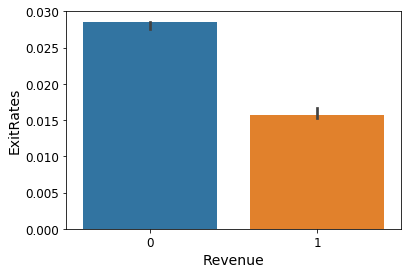

In [1507]:
sns.barplot(y='ExitRates', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

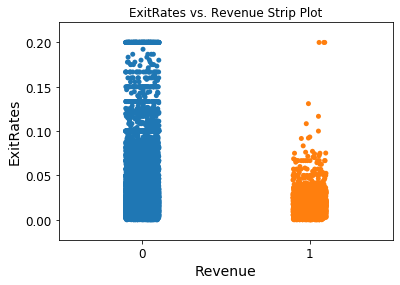

In [1442]:
sns.stripplot(x='Revenue', y='ExitRates', data=shopping_explore)
plt.title('ExitRates vs. Revenue Strip Plot')
plt.show()

## Feature: PageValues (Numerical)

In [284]:
preliminaries(shopping_explore, 'PageValues', values=False)

Dtype:  float64
Missing Values:  0


In [280]:
sum_stats(shopping_explore.PageValues)

nobs: 9864
median: 0.0
mode: [0.]
mean: 5.832986518012469
std: 18.48354620561207
minmax: (0.0, 361.76374189999996)
25% 0.0
50% 0.0
75% 0.0
skewness: 6.405860275842438
outliers: (0.0, 0.0)


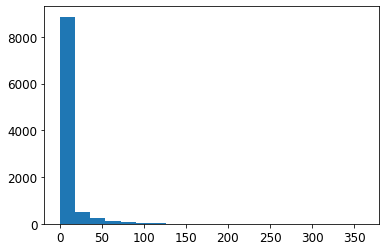

In [286]:
plt.hist(shopping_explore.PageValues, bins=20)
plt.show()

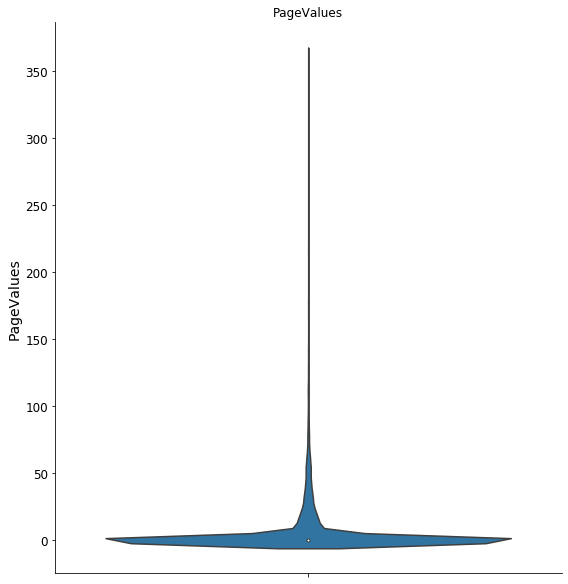

In [1443]:
sns.catplot(y='PageValues', data=shopping_explore, kind='violin', height=8)
plt.title('PageValues')
plt.show()

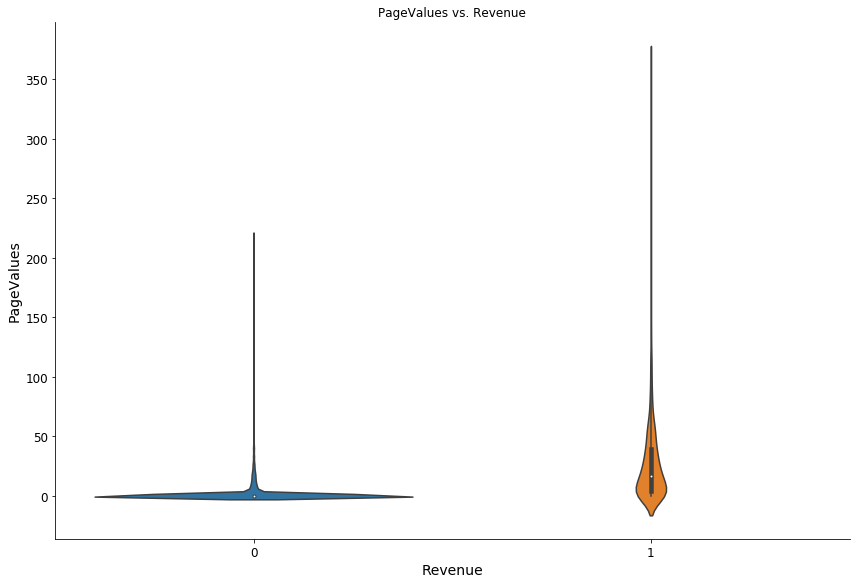

In [1444]:
fig = sns.catplot(y='PageValues', x='Revenue', data=shopping_explore, kind='violin', height=8, aspect=1.5)
plt.title('PageValues vs. Revenue')
plt.show()

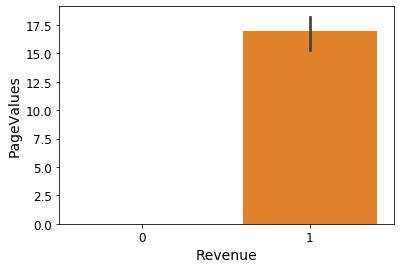

In [1511]:
sns.barplot(y='PageValues', x='Revenue', data=shopping_explore, estimator=median)
plt.show()

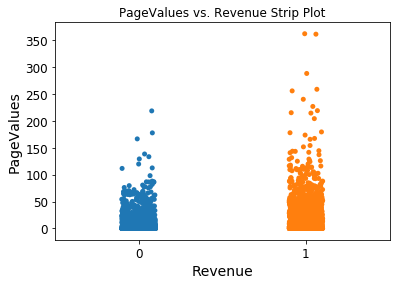

In [1445]:
sns.stripplot(x='Revenue', y='PageValues', data=shopping_explore)
plt.title('PageValues vs. Revenue Strip Plot')
plt.show()

## Feature: SpecialDay (Discrete)

In [297]:
preliminaries(shopping_explore, 'SpecialDay', values=True)

Dtype:  float64
Missing Values:  0
0.0    8870
0.6     281
0.8     269
0.4     193
0.2     137
1.0     114
Name: SpecialDay, dtype: int64


In [289]:
sum_stats(shopping_explore.SpecialDay)

nobs: 9864
median: 0.0
mode: [0.]
mean: 0.06107055961070561
std: 0.1980568421267547
minmax: (0.0, 1.0)
25% 0.0
50% 0.0
75% 0.0
skewness: 3.2985372178533523
outliers: (0.0, 0.0)


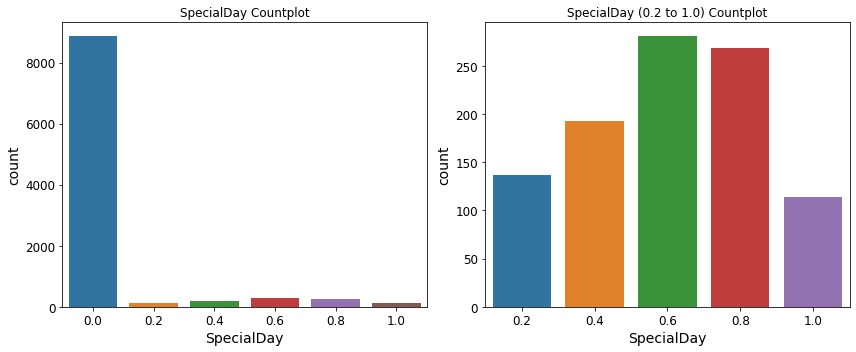

In [1448]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((12,5))
sns.countplot(shopping_explore.SpecialDay, ax=ax[0])
sns.countplot(x=shopping_explore[shopping_explore.SpecialDay>0].SpecialDay, ax=ax[1])
ax[0].title.set_text('SpecialDay Countplot')
ax[1].title.set_text('SpecialDay (0.2 to 1.0) Countplot')
plt.tight_layout()
plt.show()

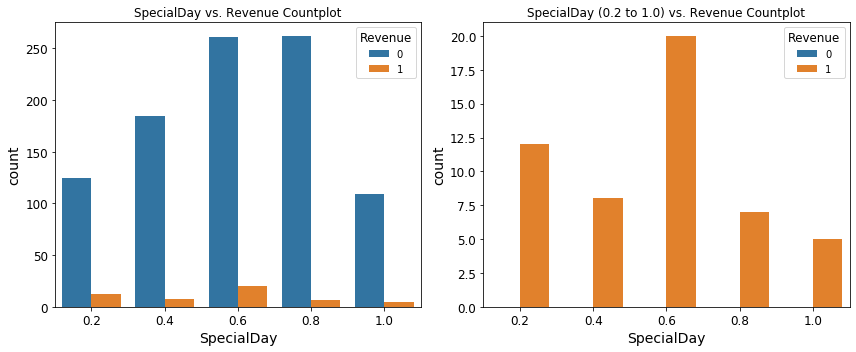

In [1449]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=shopping_explore[shopping_explore.SpecialDay>0].SpecialDay,
              hue=shopping_explore.Revenue, ax=ax[0])
# Zoom of revenue-generating counts
sns.countplot(x=shopping_explore[(shopping_explore.SpecialDay>0) & (shopping_explore.Revenue==1)].SpecialDay,
              hue=shopping_explore.Revenue, ax=ax[1])
ax[0].title.set_text('SpecialDay vs. Revenue Countplot')
ax[1].title.set_text('SpecialDay (0.2 to 1.0) vs. Revenue Countplot')
fig.set_size_inches((12,5))
plt.tight_layout()
plt.show()

In [566]:
# Statistics for NON-revenue-generating customers' SpecialDay
sum_stats(shopping_explore[shopping_explore.Revenue==0].SpecialDay)

nobs: 8367
median: 0.0
mode: [0.]
mean: 0.06862674793832915
std: 0.2091141457537401
minmax: (0.0, 1.0)
25% 0.0
50% 0.0
75% 0.0
skewness: 3.0633730722550507
outliers: (0.0, 0.0)


In [567]:
# Statistics for revenue-generating customers' SpecialDay
sum_stats(shopping_explore[shopping_explore.Revenue==1].SpecialDay)

nobs: 1497
median: 0.0
mode: [0.]
mean: 0.018837675350701404
std: 0.10941255865477162
minmax: (0.0, 1.0)
25% 0.0
50% 0.0
75% 0.0
skewness: 6.376339431180254
outliers: (0.0, 0.0)


# Categorical Features

## Feature: Month

In [301]:
preliminaries(shopping_explore, 'Month')

Dtype:  object
Missing Values:  0
May     2663
Nov     2417
Mar     1522
Dec     1387
Oct      440
Sep      354
Aug      354
Jul      354
June     235
Feb      138
Name: Month, dtype: int64


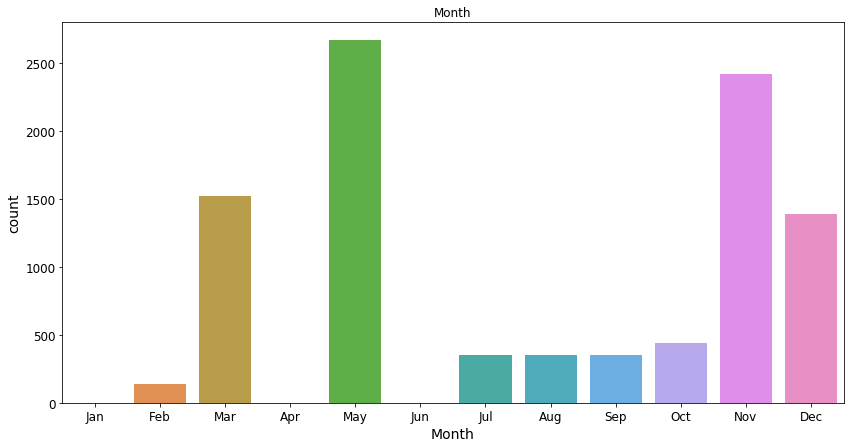

In [1450]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.Month, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month')
plt.show()

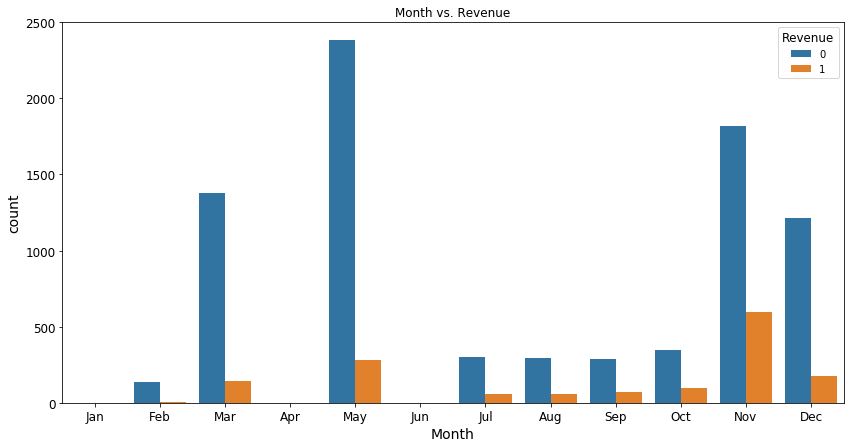

In [1451]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.Month, hue=shopping_explore.Revenue, #palette='Set2',
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month vs. Revenue')
plt.show()

Month seems to be a significant predictor of traffic and revenue.

November is by far the most profitable month. January, April, and June have hardly any visits at all. Site visits skyrocket March, May, November, and December. It doesn't seem to be seasonal, just preferenced by these 4 months.

## Feature: OperatingSystems

In [336]:
preliminaries(shopping_explore, 'OperatingSystems')

Dtype:  int64
Missing Values:  0
2    5330
1    2056
3    2012
4     380
8      67
6       9
7       5
5       5
Name: OperatingSystems, dtype: int64


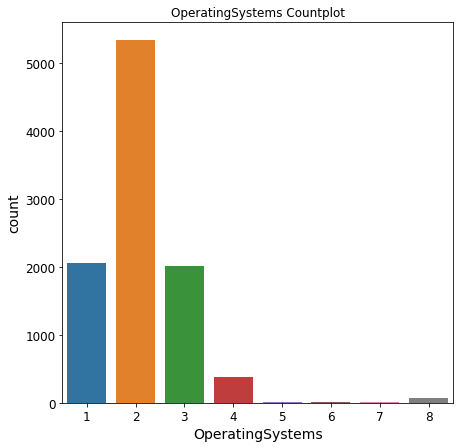

In [1452]:
plt.figure(figsize=(7,7))
sns.countplot(shopping_explore.OperatingSystems)
plt.title('OperatingSystems Countplot')
plt.show()

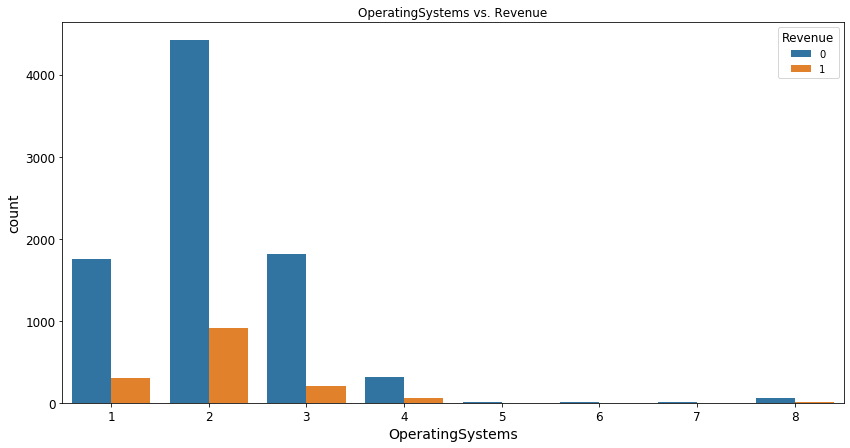

In [1453]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.OperatingSystems, hue=shopping_explore.Revenue) #palette='Set2',
plt.title('OperatingSystems vs. Revenue')
plt.show()

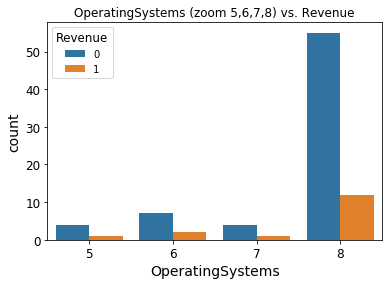

In [1454]:
# Zoom in on OperatingSystems 5,6,7,8
sns.countplot(shopping_explore[(shopping_explore.OperatingSystems==5) | (shopping_explore.OperatingSystems==6) | (shopping_explore.OperatingSystems==7) | (shopping_explore.OperatingSystems==8)]['OperatingSystems'],
              hue=shopping_explore.Revenue)
plt.title('OperatingSystems (zoom 5,6,7,8) vs. Revenue')
plt.show()

OperatingSystems 1,2,3 are most prominent, with 1 being the highest traffic and highest revenue.

## Feature: Browser

In [376]:
preliminaries(shopping_explore, 'Browser')

Dtype:  int64
Missing Values:  0
2     6358
1     1967
4      601
5      387
6      141
10     125
8      103
3       84
13      54
7       28
12      10
11       5
9        1
Name: Browser, dtype: int64


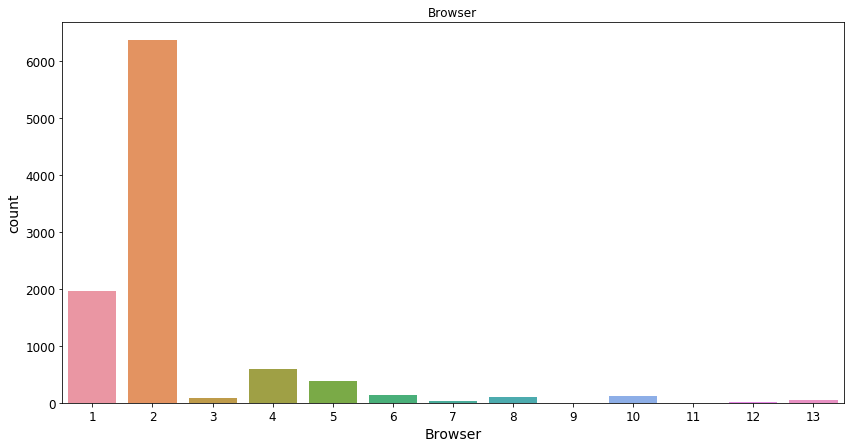

In [1455]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.Browser)
plt.title('Browser')
plt.show()

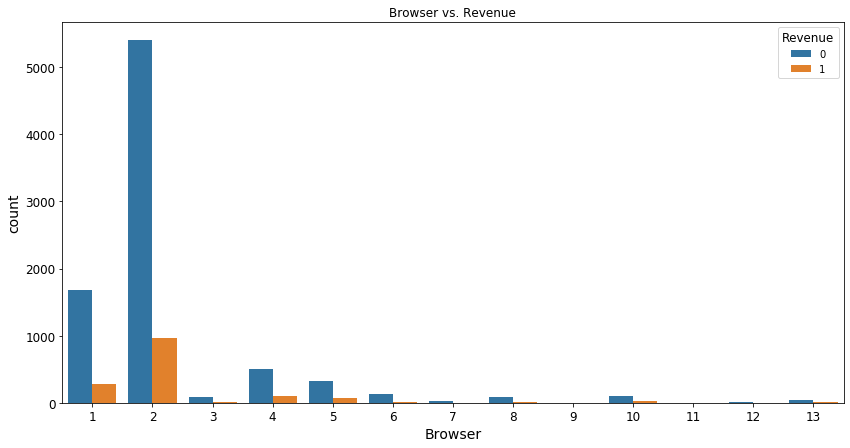

In [1456]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.Browser, hue=shopping_explore.Revenue)
plt.title('Browser vs. Revenue')
plt.show()

The most-used browser is by far 2, followed by 1, 4, and 5, with the rest of the browsers in the 100s count and below.

## Feature: Region

In [383]:
preliminaries(shopping_explore, 'Region')

Dtype:  int64
Missing Values:  0
1    3822
3    1921
4     935
2     911
6     631
7     588
9     420
8     369
5     267
Name: Region, dtype: int64


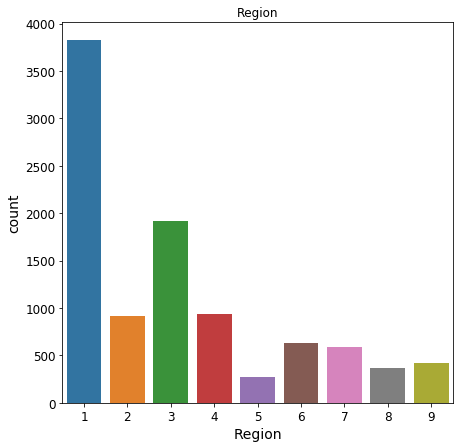

In [1457]:
plt.figure(figsize=(7,7))
sns.countplot(shopping_explore.Region)
plt.title('Region')
plt.show()

The top 2 regions are 1, 2, 3, and 4. Region 1 is more than twice as large as any other region. Region 3 is twice as large as any region after Region 1. The rest of the regions are around 500-1000.

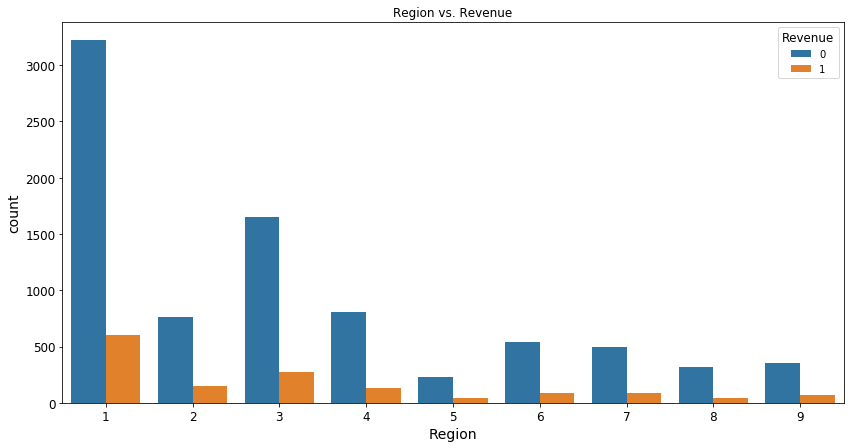

In [1458]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.Region, hue=shopping_explore.Revenue)
plt.title('Region vs. Revenue')
plt.show()

Region 1 is not only the largest, but also the most profitable. Region 3 and 2 follow. Overall, Regions 1, 2, and 3 are the most profitable regions, followed closely by Region 4.

## Feature: TrafficType

In [387]:
preliminaries(shopping_explore, 'TrafficType')

Dtype:  int64
Missing Values:  0
2     3137
1     1944
3     1670
4      835
13     569
10     372
6      348
8      272
5      214
11     210
20     164
9       32
7       30
15      30
19      15
14      10
18       7
16       3
12       1
17       1
Name: TrafficType, dtype: int64


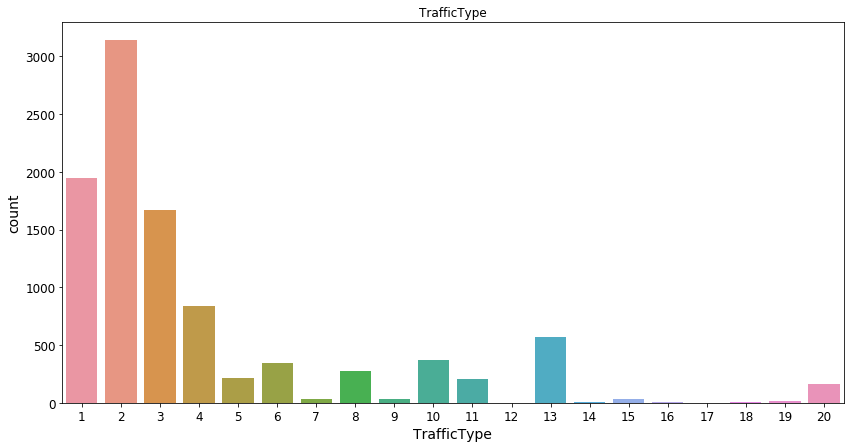

In [1459]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.TrafficType)
plt.title('TrafficType')
plt.show()

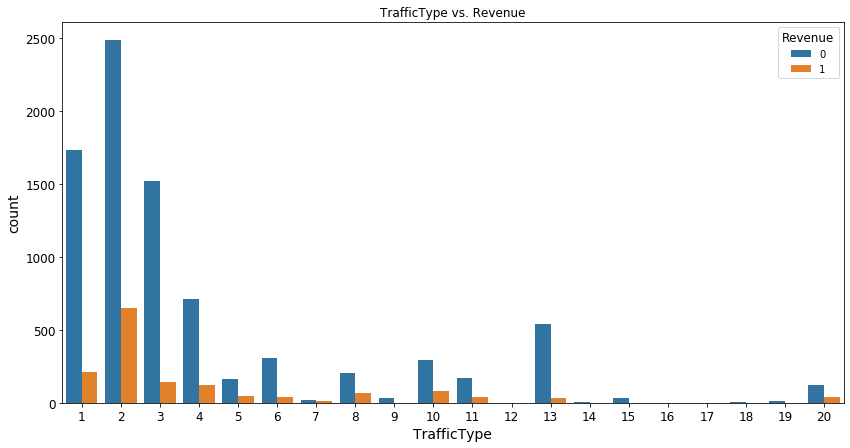

In [1460]:
plt.figure(figsize=(14,7))
sns.countplot(shopping_explore.TrafficType, hue=shopping_explore.Revenue)
plt.title('TrafficType vs. Revenue')
plt.show()

Traffic Type 1, 2, and 3 are by far the largest customer base at about 1650, 2500, and 1500 respectively, followed by TrafficType 4 and 13 at around 600. These regions are also the most profitable. TrafficType 2 is particularly profitable both in size and proportion to its total count.

## Feature: VisitorType

In [407]:
preliminaries(shopping_explore, 'VisitorType')

Dtype:  object
Missing Values:  0
Returning_Visitor    8439
New_Visitor          1350
Other                  75
Name: VisitorType, dtype: int64


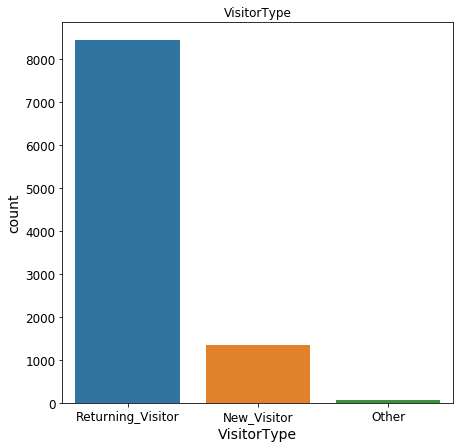

In [1461]:
plt.figure(figsize=(7,7))
sns.countplot(shopping_explore.VisitorType)
plt.title('VisitorType')
plt.show()

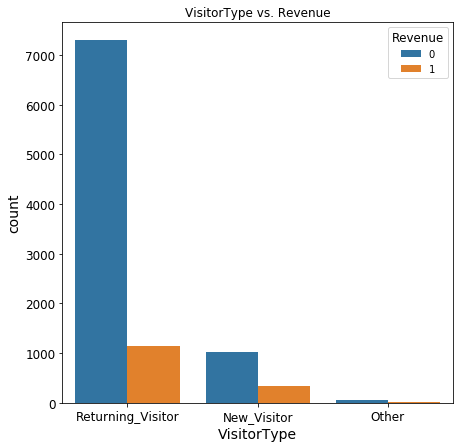

In [1462]:
plt.figure(figsize=(7,7))
sns.countplot(shopping_explore.VisitorType, hue=shopping_explore.Revenue)
plt.title('VisitorType vs. Revenue')
plt.show()

## Feature: Weekend

In [414]:
preliminaries(shopping_explore, 'Weekend')

Dtype:  bool
Missing Values:  0
False    7616
True     2248
Name: Weekend, dtype: int64


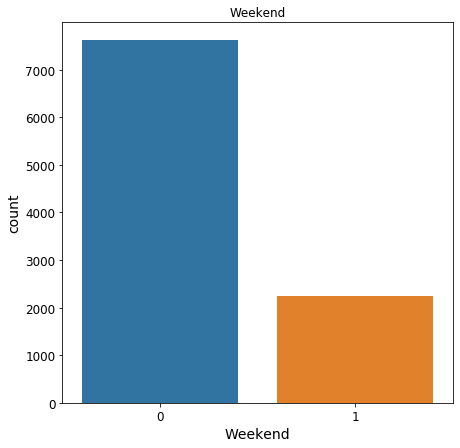

In [1464]:
plt.figure(figsize=(7,7))
sns.countplot(shopping_explore.Weekend)
plt.title('Weekend')
plt.show()

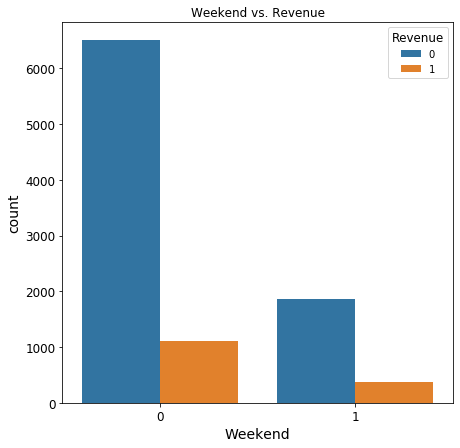

In [1465]:
plt.figure(figsize=(7,7))
sns.countplot(shopping_explore.Weekend, hue=shopping_explore.Revenue)
plt.title('Weekend vs. Revenue')
plt.show()

Much more traffice comes on weekdays, but ratios of revenue to non-revenue are about the same for weekdays and weekends.

## Multivariate Analysis

For the sake of clarity, we will be excluding outliers from boxplot visualizations.

In [949]:
cat_attribs

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [950]:
num_attribs

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

### Region Multivariate Analysis

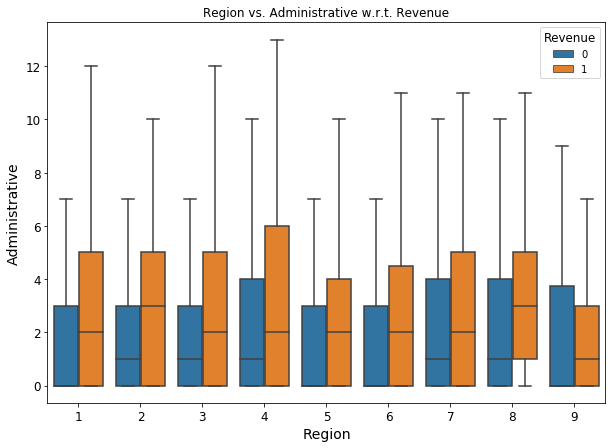

In [1467]:
# Region vs. Administrative wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='Region', y='Administrative', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('Region vs. Administrative w.r.t. Revenue')
plt.show()

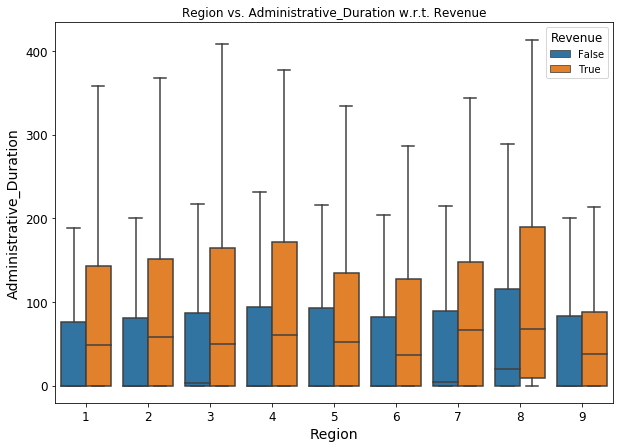

In [1088]:
# Region vs. Administrative_Duration wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='Region', y='Administrative_Duration', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('Region vs. Administrative_Duration w.r.t. Revenue')
plt.show()

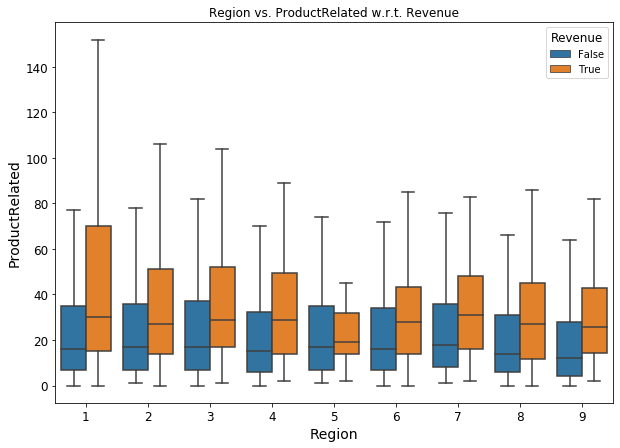

In [1096]:
# Region vs. ProductRelated wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='Region', y='ProductRelated', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('Region vs. ProductRelated w.r.t. Revenue')
plt.show()

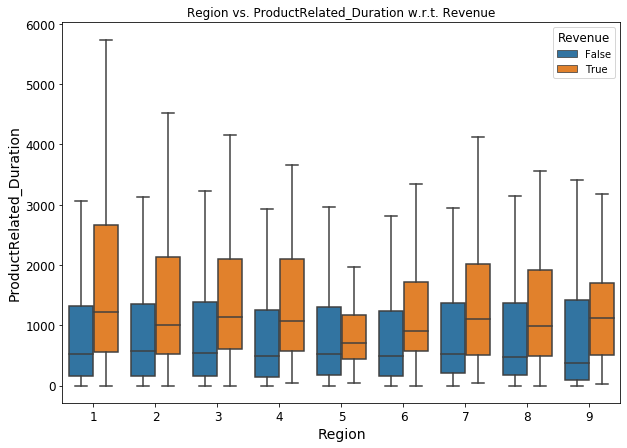

In [1098]:
# Region vs. ProductRelated_Duration wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='Region', y='ProductRelated_Duration', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('Region vs. ProductRelated_Duration w.r.t. Revenue')
plt.show()

Interestingly, behaviors seem to be uniform across regions. No one region is more predisposed to viewing a certain type of page more, or spending more time on certain types of pages.

### TrafficType Multivariate Analysis

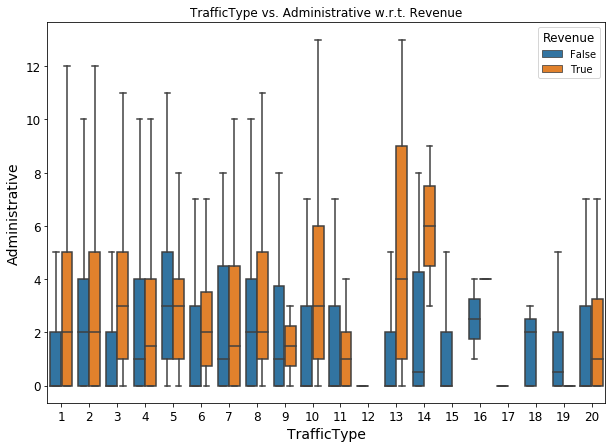

In [1102]:
# TrafficType vs. Administrative wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='TrafficType', y='Administrative', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('TrafficType vs. Administrative w.r.t. Revenue')
plt.show()

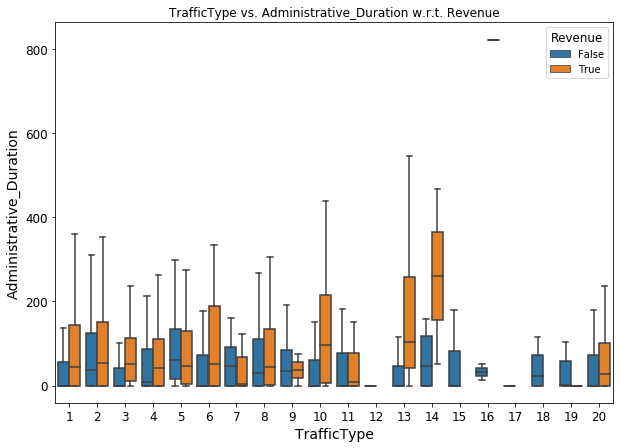

In [1103]:
# TrafficType vs. Administrative_Duration wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='TrafficType', y='Administrative_Duration', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('TrafficType vs. Administrative_Duration w.r.t. Revenue')
plt.show()

TrafficTypes 6, 10, 13, and 14 stand out as particularly profitable in relation to Administrative pages and Administrative_Duration. TrafficType 1, 10, 13, and 14 seem to get revenue with high Administrative counts and duration.

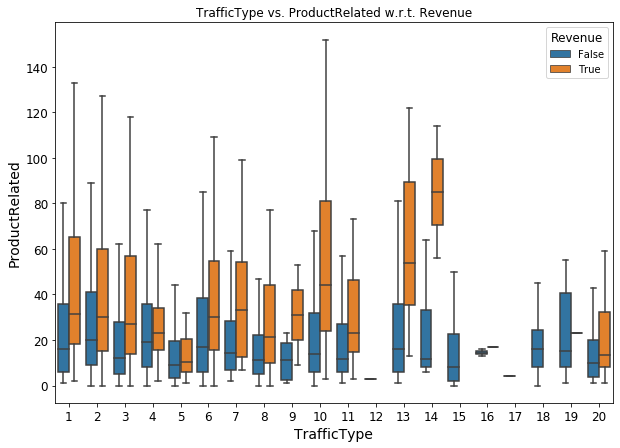

In [1104]:
# TrafficType vs. ProductRelated wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='TrafficType', y='ProductRelated', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('TrafficType vs. ProductRelated w.r.t. Revenue')
plt.show()

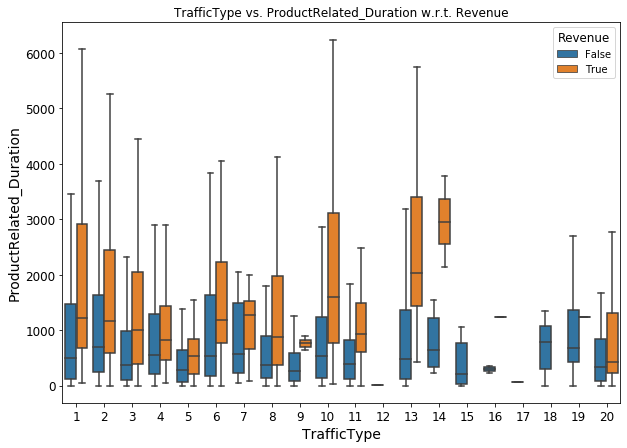

In [1105]:
# TrafficType vs. ProductRelated_Duration wrt Revenue
plt.figure(figsize=(10,7))
sns.boxplot(x='TrafficType', y='ProductRelated_Duration', hue='Revenue',
                         data=shopping_explore, showfliers=False).set_title('TrafficType vs. ProductRelated_Duration w.r.t. Revenue')
plt.show()

ProductRelated pages clearly drive revenue, as nearly all revenues have high amounts of ProductRelated page visits and durations. In addition, the longer the duration, the more there is revenue.

# Clustering

We will now cluster our page visit data and analyze the results.

In [1385]:
cluster_df = shopping_explore.copy(deep=True)

In [1386]:
cluster_attribs = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

In [1387]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_df[cluster_attribs] = scaler.fit_transform(cluster_df[cluster_attribs])

In [1388]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

k_rng = range(2,10)
silhouette = []
for k in k_rng:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df[cluster_attribs])
    silhouette.append(silhouette_score(cluster_df[cluster_attribs], kmeans.labels_))

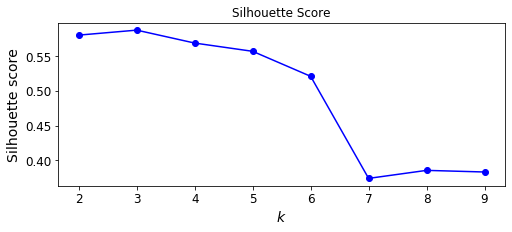

In [1468]:
plt.figure(figsize=(8,3))
plt.plot(range(2, 10), silhouette, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette Score')
plt.show()

Our highest silhouette score is at 3 clusters, so we will create 3 clusters for our data.

In [1390]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(cluster_df[cluster_attribs])
cluster_df['cluster'] = y_pred
# inverse StandardScaler to return values to normal
cluster_df[cluster_attribs] = scaler.inverse_transform(cluster_df[cluster_attribs])

cluster0 = cluster_df[cluster_df.cluster==0]
cluster1 = cluster_df[cluster_df.cluster==1]
cluster2 = cluster_df[cluster_df.cluster==2]

## Cluster Data Analysis

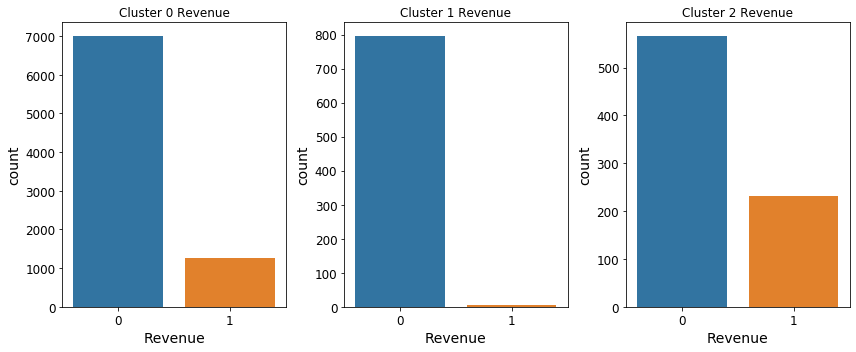

In [1391]:
# Revenues of each cluster
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
sns.countplot(cluster0.Revenue, ax=ax[0])
ax[0].title.set_text('Cluster 0 Revenue')
sns.countplot(cluster1.Revenue, ax=ax[1])
ax[1].title.set_text('Cluster 1 Revenue')
sns.countplot(cluster2.Revenue, ax=ax[2])
ax[2].title.set_text('Cluster 2 Revenue')
plt.tight_layout()
plt.show()

**Cluster 0** defines our **standard visitors**, about 10% of them generating revenue.

**Cluster 1** defines our **low-value visitors**, almost none of them generating revenue.

**Cluster 2** defines our **high-value visitors**, about 25% of them generating revenue.

In [1392]:
# Cluster 0 summary statistics
sum_stats(cluster0.Revenue.astype('int'))

nobs: 8265
median: 0.0
mode: [0]
mean: 0.15245009074410162
std: 0.3594783661753738
minmax: (0, 1)
25% 0.0
50% 0.0
75% 0.0
skewness: 1.9337516205206973
outliers: (0.0, 0.0)


In [1393]:
# Cluster 1 summary statistics
sum_stats(cluster1.Revenue.astype('int'))

nobs: 802
median: 0.0
mode: [0]
mean: 0.007481296758104738
std: 0.08622410932001083
minmax: (0, 1)
25% 0.0
50% 0.0
75% 0.0
skewness: 11.431281833421348
outliers: (0.0, 0.0)


In [1394]:
# Cluster 2 summary statistics
sum_stats(cluster2.Revenue.astype('int'))

nobs: 797
median: 0.0
mode: [0]
mean: 0.28983688833124216
std: 0.4539714184153492
minmax: (0, 1)
25% 0.0
50% 0.0
75% 1.0
skewness: 0.9264683797610238
outliers: (-1.5, 2.5)


### Page Cluster Analysis

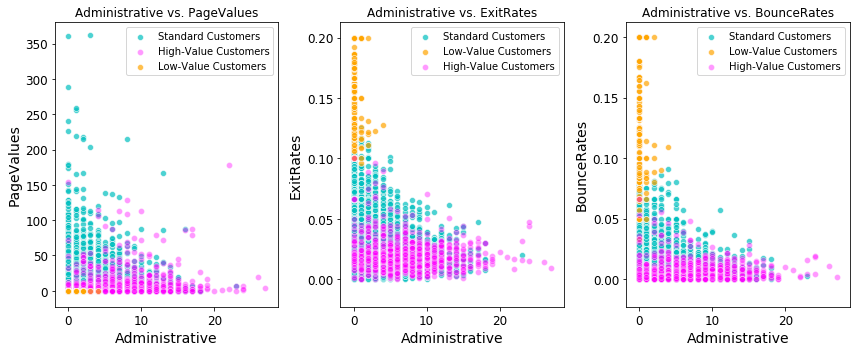

In [1397]:
# Administrative vs. Google Analytics

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

sns.scatterplot(cluster0.Administrative, cluster0.PageValues, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[0])
sns.scatterplot(cluster2.Administrative, cluster2.PageValues, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[0], y_jitter=10)
sns.scatterplot(cluster1.Administrative, cluster1.PageValues, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[0])
ax[0].title.set_text('Administrative vs. PageValues')

sns.scatterplot(cluster0.Administrative, cluster0.ExitRates, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[1])
sns.scatterplot(cluster1.Administrative, cluster1.ExitRates, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[1])
sns.scatterplot(cluster2.Administrative, cluster2.ExitRates, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[1])
ax[1].title.set_text('Administrative vs. ExitRates')

sns.scatterplot(cluster0.Administrative, cluster0.BounceRates, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[2])
sns.scatterplot(cluster1.Administrative, cluster1.BounceRates, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[2])
sns.scatterplot(cluster2.Administrative, cluster2.BounceRates, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[2])
ax[2].title.set_text('Administrative vs. BounceRates')
plt.legend()
plt.tight_layout()

plt.show()

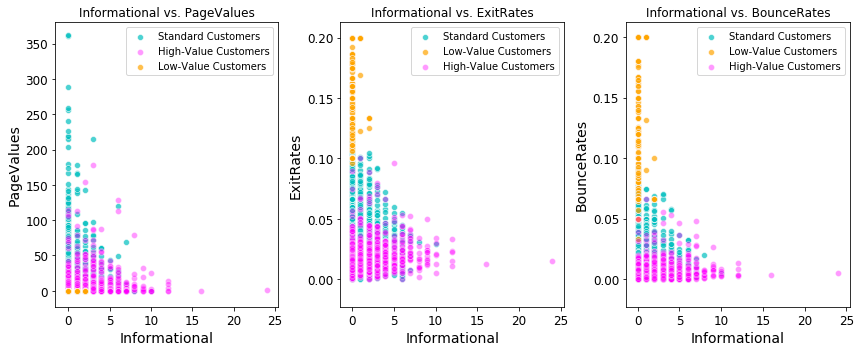

In [1398]:
# Informational vs. Google Analytics
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

sns.scatterplot(cluster0.Informational, cluster0.PageValues, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[0])
sns.scatterplot(cluster2.Informational, cluster2.PageValues, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[0], y_jitter=10)
sns.scatterplot(cluster1.Informational, cluster1.PageValues, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[0])
ax[0].title.set_text('Informational vs. PageValues')

sns.scatterplot(cluster0.Informational, cluster0.ExitRates, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[1])
sns.scatterplot(cluster1.Informational, cluster1.ExitRates, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[1])
sns.scatterplot(cluster2.Informational, cluster2.ExitRates, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[1])
ax[1].title.set_text('Informational vs. ExitRates')

sns.scatterplot(cluster0.Informational, cluster0.BounceRates, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[2])
sns.scatterplot(cluster1.Informational, cluster1.BounceRates, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[2])
sns.scatterplot(cluster2.Informational, cluster2.BounceRates, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[2])
ax[2].title.set_text('Informational vs. BounceRates')
plt.legend()
plt.tight_layout()

plt.show()

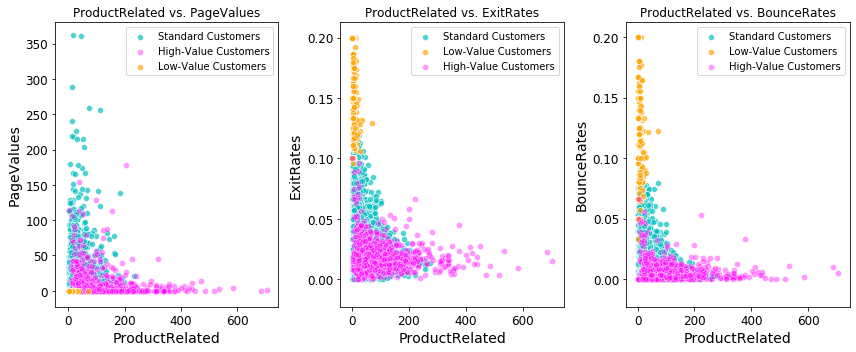

In [1399]:
# ProductRelated vs. Google Analytics
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

sns.scatterplot(cluster0.ProductRelated, cluster0.PageValues, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[0])
sns.scatterplot(cluster2.ProductRelated, cluster2.PageValues, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[0], y_jitter=10)
sns.scatterplot(cluster1.ProductRelated, cluster1.PageValues, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[0])
ax[0].title.set_text('ProductRelated vs. PageValues')

sns.scatterplot(cluster0.ProductRelated, cluster0.ExitRates, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[1])
sns.scatterplot(cluster1.ProductRelated, cluster1.ExitRates, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[1])
sns.scatterplot(cluster2.ProductRelated, cluster2.ExitRates, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[1])
ax[1].title.set_text('ProductRelated vs. ExitRates')

sns.scatterplot(cluster0.ProductRelated, cluster0.BounceRates, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[2])
sns.scatterplot(cluster1.ProductRelated, cluster1.BounceRates, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[2])
sns.scatterplot(cluster2.ProductRelated, cluster2.BounceRates, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[2])
ax[2].title.set_text('ProductRelated vs. BounceRates')
plt.legend()
plt.tight_layout()

plt.show()

High-Value customers seem to have lower PageValues, ExitRates, and BounceRates than Standard Customers for all page types, and tend to view more pages than Standard Customers. The lower ExitRates and BounceRates make sense since more High-Value customers make purchases and therefore don't exit/bounce as often. But it is interesting that Standard Customers tend to have higher PageValues. Many High-Value customers even have extremely low PageValues, which is questionable.

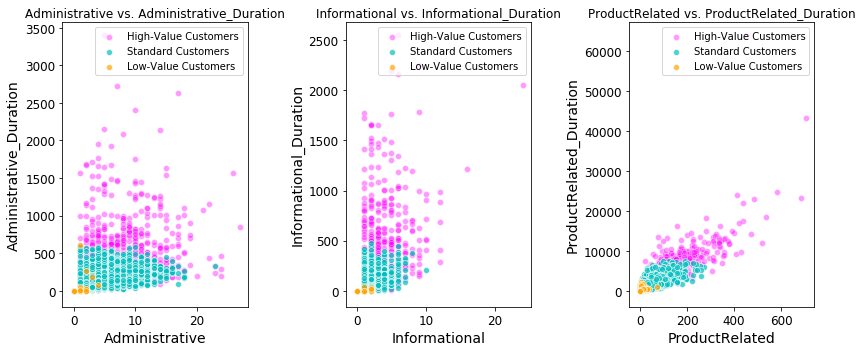

In [1400]:
# page vs. page_duration
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

sns.scatterplot(cluster2.Administrative, cluster2.Administrative_Duration, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[0], y_jitter=10)
sns.scatterplot(cluster0.Administrative, cluster0.Administrative_Duration, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[0])
sns.scatterplot(cluster1.Administrative, cluster1.Administrative_Duration, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[0])
ax[0].title.set_text('Administrative vs. Administrative_Duration')

sns.scatterplot(cluster2.Informational, cluster2.Informational_Duration, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[1])
sns.scatterplot(cluster0.Informational, cluster0.Informational_Duration, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[1])
sns.scatterplot(cluster1.Informational, cluster1.Informational_Duration, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[1])
ax[1].title.set_text('Informational vs. Informational_Duration')

sns.scatterplot(cluster2.ProductRelated, cluster2.ProductRelated_Duration, alpha=0.4,
                label='High-Value Customers', color='magenta', ax=ax[2])
sns.scatterplot(cluster0.ProductRelated, cluster0.ProductRelated_Duration, alpha=0.7,
                label='Standard Customers', color='c', ax=ax[2])
sns.scatterplot(cluster1.ProductRelated, cluster1.ProductRelated_Duration, alpha=0.7,
                label='Low-Value Customers', color='orange', ax=ax[2])
ax[2].title.set_text('ProductRelated vs. ProductRelated_Duration')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

High-Value Customers spend more time on all types of pages and visit more pages, while Standard Customers visit for less time but view similar amounts of pages.

High-Value Customers prefer to visit pages longer than others before making a purchase.

In [1401]:
cat_attribs

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'SpecialDay']

In [1402]:
num_attribs

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

### TrafficType Cluster Analysis

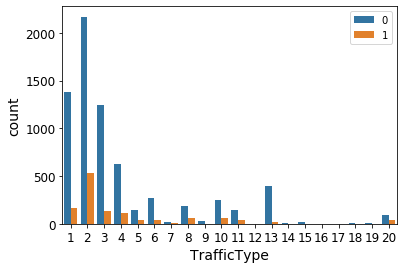

In [1403]:
sns.countplot(x=cluster0.TrafficType, hue=cluster0.Revenue)
plt.legend(loc='upper right')
plt.show()

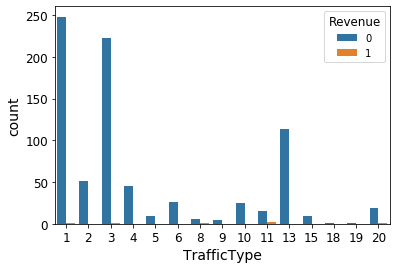

In [1404]:
sns.countplot(x=cluster1.TrafficType, hue=cluster1.Revenue)
plt.show()

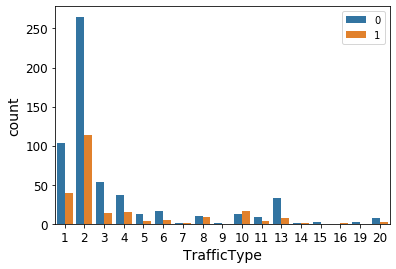

In [1405]:
sns.countplot(x=cluster2.TrafficType, hue=cluster2.Revenue)
plt.legend(loc='upper right')
plt.show()

TrafficType 8 and 10 shows abnormally high profitability in ratio to its non-revenue generating visits.

# Correlations

In [1470]:
# Correlation Matrix
corr_matrix = shopping_explore.corr(method='pearson')

Compare correlations to label value:

In [1471]:
# Compare correlations to label value
corr_matrix['Revenue']

Administrative             0.126812
Administrative_Duration    0.088759
Informational              0.096208
Informational_Duration     0.065073
ProductRelated             0.145314
ProductRelated_Duration    0.139833
BounceRates               -0.147753
ExitRates                 -0.205205
PageValues                 0.495700
SpecialDay                -0.090200
OperatingSystems          -0.021798
Browser                    0.022380
Region                    -0.010927
TrafficType               -0.000605
Weekend                    0.026159
Revenue                    1.000000
Name: Revenue, dtype: float64

//anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


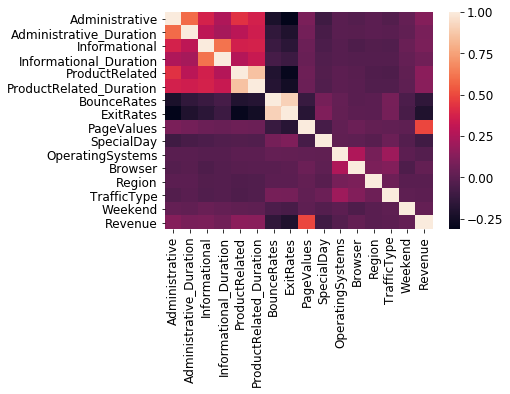

In [1472]:
# Heatmap
sns.heatmap(corr_matrix)
plt.show()

PageValues correlates positive-highly with Revenue, while BounceRates/ExitRates correlate negative-highly with Revenue.

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

In [1372]:
# Function to clean shopping DataFrames
def clean_shopping(df):
    df_copy = df.copy(deep=True)
    df_copy['Weekend'] = df['Weekend'].astype('int')
    df_copy['Revenue'] = df['Revenue'].astype('int')
    return df_copy

In [1221]:
shopping_train.head()

Administrative  Administrative_Duration  Informational  \
1785                0                      0.0              0   
10407               2                     14.0              0   
286                 0                      0.0              0   
6520                5                     49.2              4   
12251               0                      0.0              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1785                      0.0               7                95.000000   
10407                     0.0              81              1441.910588   
286                       0.0               1                 0.000000   
6520                    379.0               5                74.600000   
12251                     5.0               9               279.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1785      0.014286   0.061905    0.000000         0.0   Mar                 2   
10407     0.002469   0.013933    2.769599         0.0   Nov                 2   
286       0.200000   0.200000    0.000000         0.0   Mar                 2   
6520      0.000000   0.018182    8.326728         0.0   Sep                 2   
12251     0.040000   0.041667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1785         6       1            1  Returning_Visitor    False    False  
10407        2       3            2  Returning_Visitor    False    False  
286          2       1            1  Returning_Visitor    False    False  
6520         2       8            2        New_Visitor    False    False  
12251        2       7            8        New_Visitor     True    False

In [1373]:
# Clean shopping training data and review it looks correct
shopping_prepared = clean_shopping(shopping_train)
shopping_prepared.head()

Administrative  Administrative_Duration  Informational  \
1785                0                      0.0              0   
10407               2                     14.0              0   
286                 0                      0.0              0   
6520                5                     49.2              4   
12251               0                      0.0              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1785                      0.0               7                95.000000   
10407                     0.0              81              1441.910588   
286                       0.0               1                 0.000000   
6520                    379.0               5                74.600000   
12251                     5.0               9               279.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1785      0.014286   0.061905    0.000000         0.0   Mar                 2   
10407     0.002469   0.013933    2.769599         0.0   Nov                 2   
286       0.200000   0.200000    0.000000         0.0   Mar                 2   
6520      0.000000   0.018182    8.326728         0.0   Sep                 2   
12251     0.040000   0.041667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1785         6       1            1  Returning_Visitor        0        0  
10407        2       3            2  Returning_Visitor        0        0  
286          2       1            1  Returning_Visitor        0        0  
6520         2       8            2        New_Visitor        0        0  
12251        2       7            8        New_Visitor        1        0

In [1374]:
# Drop label column from shopping_prepared and create y_train
y_train = shopping_prepared['Revenue'].copy(deep=True)
shopping_prepared.drop('Revenue', axis=1, inplace=True)

### Transformation Pipelines

In [1375]:
# Creating numerical pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

To weave the categorical values into this pipeline, we use sklearn's ColumnTransformer:

In [1376]:
# ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(categories='auto',
                          drop='first', sparse=False), cat_attribs),
])

X_train = full_pipeline.fit_transform(shopping_prepared)

In [1377]:
# Check shapes of X_train vs. shopping_prepared
print(X_train.shape)
print(shopping_prepared.shape)

(9864, 72)
(9864, 17)


Also create df only using num_pipeline for tree-based w/o OneHotEncoder.

In [1378]:
# Creating Tree numerical and categorical pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

num_pipeline_trees = Pipeline([
    ('std_scaler_num_tree', StandardScaler())
])

cat_pipeline_trees = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ('std_scaler_cat_tree', StandardScaler())
])

In [1379]:
# ColumnTransformer for Trees
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

full_pipeline_trees = ColumnTransformer([
    ('num_trees', num_pipeline_trees, num_attribs),
    ('cat_trees', cat_pipeline_trees, cat_attribs),
])

X_train_trees = full_pipeline_trees.fit_transform(shopping_prepared)

In [1380]:
# Confirm shape of X_train_trees == shopping_prepared
print(X_train_trees.shape)
print(shopping_prepared.shape)

(9864, 17)
(9864, 17)


# Select and Train a Model

### Functions

In [1251]:
# Model Evaluation Metrics
def model_evaluation_metrics(fitted_model, X_train, y_train,
                             cv=5, non_cv_metrics=True):
    '''
    function to output:
    1) CV confusion matrix
    2) CV Evaluation Metrics (accuracy, recall, precision, f1).
    3) non-CV Evaluation Metrics
    '''
    from sklearn.model_selection import cross_val_predict
    y_pred = cross_val_predict(fitted_model, X_train, y_train, cv=cv)
    
    # CV Confusion Matrix
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_train, y_pred)
    print('Confusion Matrix:')
    print(confusion_matrix)
    print()
    
    # CV Evaluation Metrics
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    print('CV Scores:')
    print('CV Accuracy Score:', accuracy_score(y_train, y_pred))
    print('CV Precision Score:', precision_score(y_train, y_pred))
    print('CV Recall Score:', recall_score(y_train, y_pred))
    print('CV F1 Score:', f1_score(y_train, y_pred))
    print()
    
    # non-CV Evaluation Metrics
    if non_cv_metrics == True:
        y_pred_non_cv = fitted_model.predict(X_train)
        print('Non-CV Scores:')
        print('Non-CV Accuracy Score:', accuracy_score(y_train, y_pred_non_cv))
        print('Non-CV Precision Score:', precision_score(y_train, y_pred_non_cv))
        print('Non-CV Recall Score:', recall_score(y_train, y_pred_non_cv))
        print('Non-CV F1 Score:', f1_score(y_train, y_pred_non_cv))

In [1252]:
# Plot precision-recall curves
def plot_precision_recall_curves(fitted_model, X_train, y_train, cv=5, method='decision_function',
                                 xlim=[-10,10],
                                 predict_proba=False):
    '''
    A function to output:
        1) Precision-Recall-Threshold Graph
        2) Precision-Recall Graph
    '''
    if method == 'decision_function':
        from sklearn.model_selection import cross_val_predict
        df_pred_scores = cross_val_predict(fitted_model,
                                            X_train,
                                            y_train,
                                            cv=cv,
                                            method=method)

        from sklearn.metrics import precision_recall_curve
        precisions, recalls, thresholds = precision_recall_curve(
                                            y_train,
                                            df_pred_scores)

    if method == 'predict_proba':
        from sklearn.model_selection import cross_val_predict
        df_pred_scores = cross_val_predict(fitted_model,
                                            X_train,
                                            y_train,
                                            cv=cv,
                                            method=method)

        from sklearn.metrics import precision_recall_curve
        precisions, recalls, thresholds = precision_recall_curve(
                                            y_train,
                                            df_pred_scores[:, 1])

    # Precision-Recall-Threshold Graph
    def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
        plt.plot(thresholds, precisions[:-1], 'b--',
                 label='Precision', linewidth=2)
        plt.plot(thresholds, recalls[:-1], 'g-',
                 label='Recall', linewidth=2)
        plt.xlabel('Threshold', fontsize=16)
        plt.legend(loc='upper left', fontsize=16)
        plt.ylim([0, 1])

    plt.figure(figsize=(8, 4))
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.xlim(xlim)
    plt.show()        
    
    # Precision-Recall Graph
    def plot_precision_vs_recall(precisions, recalls):
        plt.plot(recalls, precisions, 'b-', linewidth=2)
        plt.xlabel('Recall', fontsize=16)
        plt.ylabel('Precision', fontsize=16)
        plt.axis([0, 1, 0, 1])
    
    plt.figure(figsize=(8, 6))
    plot_precision_vs_recall(precisions, recalls)
    plt.show()

    '''
    def adjusted_classes(y_scores, t):
        """
        A function for adjusting class predictions based on the prediction threshold (t).
        Will only work for binary classification problems.
        
        return [1 if y >= t else 0 for y in y_scores]'''

In [1253]:
# Run GridSearchCV
def model_grid_search(model, X_train, y_train, param_grid, cv=5,
                      scoring='f1'):
    '''
    A function to perform GridSearchCV and output:
        1) best params
        2) best estimator
        3) test scores
    '''

    # To ignore warnings
    import warnings
    warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"
    
    # Perform GridSearchCV
    start_time = time.time()
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=cv,
                               scoring=scoring,
                               return_train_score=True)
    grid_search.fit(X_train, y_train)

    running_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=running_time)))

    # best params
    print('\nBest Parameters:\n', grid_search.best_params_)

    # best estimator
    print('\nBest Estimator:\n', grid_search.best_estimator_)

    # test scores
    print('\n' + str(scoring) + ' Test Scores:\n')
    print('Best Test Score:', grid_search.cv_results_['mean_test_score'].max())
    print()
    cvres = grid_search.cv_results_
    for test_score, params in zip(cvres['mean_test_score'], cvres['params']):
        print(test_score, params)

    # cv results
    #cv_results = pd.DataFrame(grid_search.cv_results_)
    #print('\n CV Results:\n')
    #return cv_results
    
    # To stop ignoring warnings
    warnings.resetwarnings()
    
    return grid_search

### Determine Scoring Metrics

In [1254]:
y_train.value_counts()

0    8367
1    1497
Name: Revenue, dtype: int64

Use PR when:
    
-  The Positive class is rare.

-  Care more about FP than FN.

Otherwise use ROC AUC.

The positive class is rare, so we should use PR and F1.

## Models

## SGD Classifier

SGDClassifier handles very large datasets efficiently because it handles each training instance independently, one at a time.

In [1255]:
start_time = time.time()

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000,
                        tol=1e-3,
                        random_state=42)
sgd_clf.fit(X_train, y_train)

sgd_clf_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=sgd_clf_time)))

Running Time: 0:00:00.190154


#### SGD Classifier Evaluation Metrics

In [1256]:
model_evaluation_metrics(sgd_clf,
                         X_train,
                         y_train)

Confusion Matrix:
[[8177  190]
 [ 896  601]]

CV Scores:
CV Accuracy Score: 0.8899026763990268
CV Precision Score: 0.7597977243994943
CV Recall Score: 0.4014696058784235
CV F1 Score: 0.5253496503496503

Non-CV Scores:
Non-CV Accuracy Score: 0.8893957826439578
Non-CV Precision Score: 0.7875354107648725
Non-CV Recall Score: 0.37140948563794257
Non-CV F1 Score: 0.5047662278710849


F1 score isn't very useful since P/R aren't very close.

Plot our PR Curve to decide which threshold to use for PR.

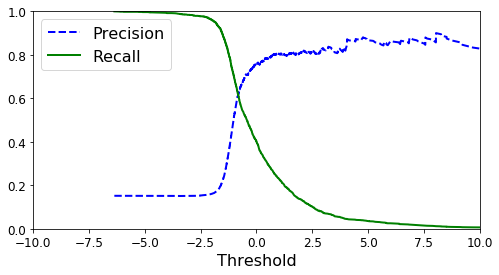

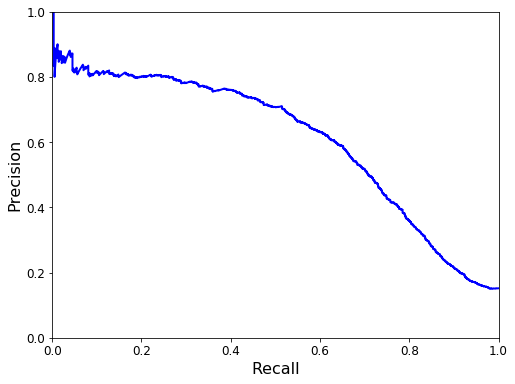

In [1258]:
# Plot PR Curves
plot_precision_recall_curves(sgd_clf,
                             X_train, y_train)

#### SGD Classifier Grid Search

In [1259]:
# Generic model
sgd_clf_model_grid_search = SGDClassifier(max_iter=1000,
                        tol=1e-3,
                        n_jobs=-1,
                        random_state=42)

# Parameter Grid
sgd_clf_param_grid = [
    {'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
     'penalty': ['l1', 'l2']}
]

# Run Grid Search
sgd_clf_grid_search = model_grid_search(sgd_clf_model_grid_search,
                      X_train, y_train,
                      sgd_clf_param_grid, cv=5,
                      scoring='f1')

Running Time: 0:00:07.745713

Best Parameters:
 {'alpha': 0.0001, 'penalty': 'l1'}

Best Estimator:
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

f1 Test Scores:

Best Test Score: 0.5394500035863519

0.3630743884182015 {'alpha': 1e-06, 'penalty': 'l1'}
0.42934431254015754 {'alpha': 1e-06, 'penalty': 'l2'}
0.49085360722002525 {'alpha': 1e-05, 'penalty': 'l1'}
0.516454463191312 {'alpha': 1e-05, 'penalty': 'l2'}
0.5394500035863519 {'alpha': 0.0001, 'penalty': 'l1'}
0.5207393160921356 {'alpha': 0.0001, 'penalty': 'l2'}
0.5321394284700703 {'alpha': 0.001, 'penalty': 'l1'}
0.5264863260197854 {'alpha': 0.001, 'penalty': 'l2

In [1261]:
model_evaluation_metrics(sgd_clf_grid_search.best_estimator_,
                         X_train, y_train)

Confusion Matrix:
[[8155  212]
 [ 859  638]]

CV Scores:
CV Accuracy Score: 0.8914233576642335
CV Precision Score: 0.7505882352941177
CV Recall Score: 0.42618570474281897
CV F1 Score: 0.5436727737537281

Non-CV Scores:
Non-CV Accuracy Score: 0.8924371451743714
Non-CV Precision Score: 0.7523148148148148
Non-CV Recall Score: 0.43420173680694724
Non-CV F1 Score: 0.5506141465480728


In [1262]:
sgd_clf_final = sgd_clf_grid_search.best_estimator_

## Logistic Regression

In [1263]:
start_time = time.time()

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

log_reg_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=log_reg_time)))

Running Time: 0:00:00.351941


In [1264]:
model_evaluation_metrics(log_reg,
                         X_train, y_train)

Confusion Matrix:
[[8171  196]
 [ 924  573]]

CV Scores:
CV Accuracy Score: 0.8864557988645579
CV Precision Score: 0.7451235370611183
CV Recall Score: 0.38276553106212424
CV F1 Score: 0.5057369814651368

Non-CV Scores:
Non-CV Accuracy Score: 0.8886861313868614
Non-CV Precision Score: 0.7547892720306514
Non-CV Recall Score: 0.39478957915831664
Non-CV F1 Score: 0.5184210526315789


#### Logistic Regression PR Curve

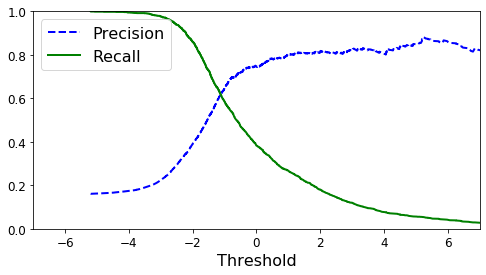

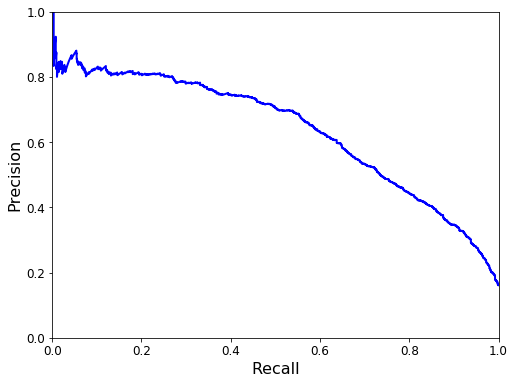

In [1265]:
plot_precision_recall_curves(log_reg,
                             X_train, y_train,
                             xlim=[-7,7])

#### Logistic Regression Grid Search

In [1266]:
# Generic model
log_reg_model_grid_search = LogisticRegression(solver='liblinear',
                                               random_state=42)

# Parameter grid
log_reg_param_grid = [
    {'C': [1e-7, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
     'penalty': ['l1', 'l2']}
]

# Grid Search
log_reg_grid_search = model_grid_search(log_reg_model_grid_search,
                                        X_train, y_train,
                                        log_reg_param_grid)

Running Time: 0:00:07.895094

Best Parameters:
 {'C': 0.1, 'penalty': 'l2'}

Best Estimator:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

f1 Test Scores:

Best Test Score: 0.5062563746602071

0.0 {'C': 1e-07, 'penalty': 'l1'}
0.10792666927967262 {'C': 1e-07, 'penalty': 'l2'}
0.0 {'C': 0.0001, 'penalty': 'l1'}
0.16647915522959958 {'C': 0.0001, 'penalty': 'l2'}
0.11770715121470376 {'C': 0.001, 'penalty': 'l1'}
0.33873555996111226 {'C': 0.001, 'penalty': 'l2'}
0.4770261841812906 {'C': 0.01, 'penalty': 'l1'}
0.47367772362151167 {'C': 0.01, 'penalty': 'l2'}
0.5045579494666121 {'C': 0.1, 'penalty': 'l1'}
0.5062563746602071 {'C': 0.1, 'penalty': 'l2'}
0.5044048317077593 {'C': 1.0, 'penalty': 'l1'}
0.5051270206742

In [1268]:
# Grid search evaluation metrics
model_evaluation_metrics(log_reg_grid_search.best_estimator_,
                         X_train, y_train)

Confusion Matrix:
[[8176  191]
 [ 924  573]]

CV Scores:
CV Accuracy Score: 0.8869626926196269
CV Precision Score: 0.75
CV Recall Score: 0.38276553106212424
CV F1 Score: 0.5068553737284387

Non-CV Scores:
Non-CV Accuracy Score: 0.887875101378751
Non-CV Precision Score: 0.7542262678803641
Non-CV Recall Score: 0.38744154976619904
Non-CV F1 Score: 0.5119152691968226


In [1269]:
log_reg_final = log_reg_grid_search.best_estimator_

### Support Vector Machines

### Linear SVC

In [1270]:
start_time = time.time()

from sklearn.svm import LinearSVC
linear_svc = LinearSVC(loss='hinge', max_iter=1000000,
                       random_state=42)
linear_svc.fit(X_train, y_train)

linear_svc_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=linear_svc_time)))

Running Time: 0:00:01.661142


In [1271]:
model_evaluation_metrics(linear_svc,
                         X_train, y_train)

Confusion Matrix:
[[8162  205]
 [ 888  609]]

CV Scores:
CV Accuracy Score: 0.8891930251419302
CV Precision Score: 0.7481572481572482
CV Recall Score: 0.40681362725450904
CV F1 Score: 0.5270445694504544

Non-CV Scores:
Non-CV Accuracy Score: 0.8907137064071371
Non-CV Precision Score: 0.7557997557997558
Non-CV Recall Score: 0.4134936539746159
Non-CV F1 Score: 0.5345423143350604


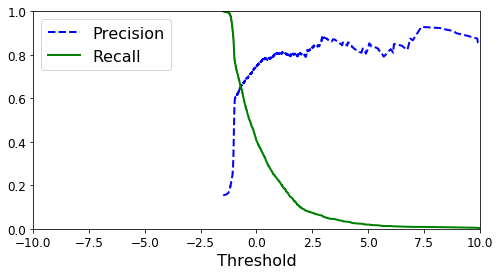

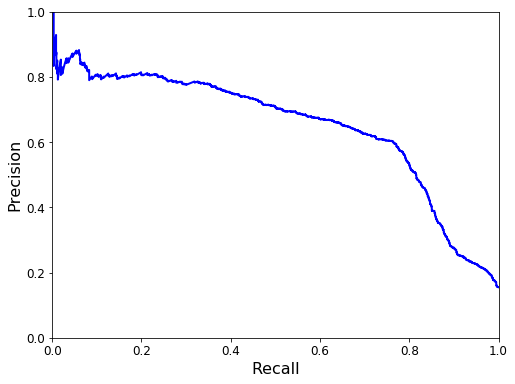

In [1272]:
plot_precision_recall_curves(linear_svc,
                             X_train, y_train)

### Poly/RBF Kernel SVC

We'll start with a poly kernel before grid search just to see how it performs.

In [1273]:
start_time = time.time()

from sklearn.svm import SVC
poly_kernel_svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5,
                          gamma='auto')
poly_kernel_svm_clf.fit(X_train, y_train)

poly_svm_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=poly_svm_time)))

Running Time: 0:00:04.208906


In [1275]:
model_evaluation_metrics(poly_kernel_svm_clf,
                         X_train, y_train)

Confusion Matrix:
[[8112  255]
 [ 759  738]]

CV Scores:
CV Accuracy Score: 0.8972019464720195
CV Precision Score: 0.743202416918429
CV Recall Score: 0.49298597194388777
CV F1 Score: 0.5927710843373494

Non-CV Scores:
Non-CV Accuracy Score: 0.9070356853203568
Non-CV Precision Score: 0.7854330708661418
Non-CV Recall Score: 0.533066132264529
Non-CV F1 Score: 0.6350974930362117


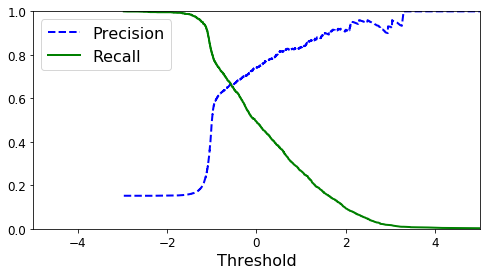

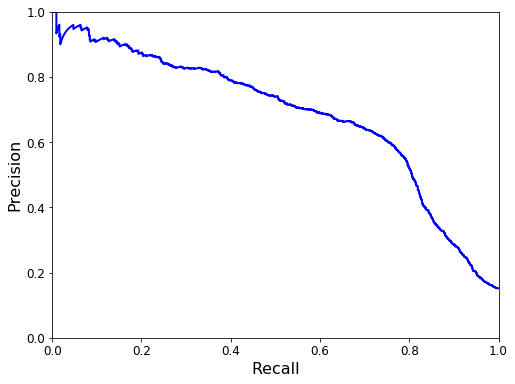

In [1276]:
plot_precision_recall_curves(poly_kernel_svm_clf,
                             X_train, y_train,
                             xlim=[-5,5])

### Decision Trees

In [1280]:
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=1,
                                  random_state=42)
tree_clf.fit(X_train_trees, y_train)
print(tree_clf)

tree_clf_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=tree_clf_time)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
Running Time: 0:00:00.008752


In [1281]:
model_evaluation_metrics(tree_clf,
                         X_train_trees, y_train)

Confusion Matrix:
[[7496  871]
 [ 338 1159]]

CV Scores:
CV Accuracy Score: 0.8774330900243309
CV Precision Score: 0.570935960591133
CV Recall Score: 0.7742150968603875
CV F1 Score: 0.6572157641054721

Non-CV Scores:
Non-CV Accuracy Score: 0.8767234387672344
Non-CV Precision Score: 0.5666192508297772
Non-CV Recall Score: 0.7982631930527722
Non-CV F1 Score: 0.6627842484747642


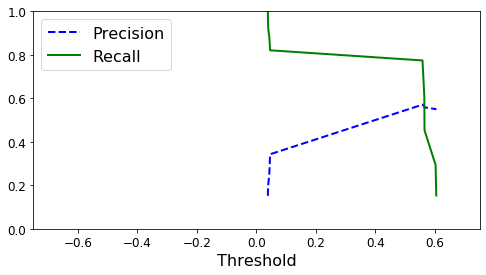

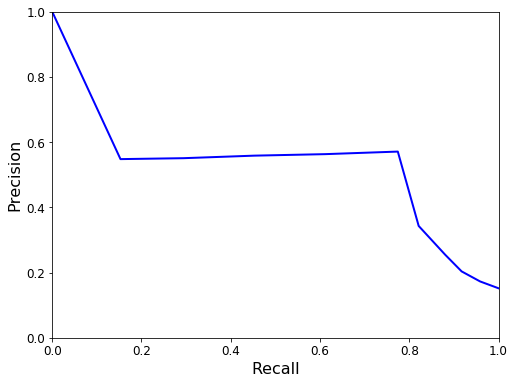

In [1282]:
plot_precision_recall_curves(tree_clf,
                             X_train_trees, y_train,
                             method='predict_proba',
                             xlim=[-.75,.75])

In [1284]:
tree_clf_model_grid_search = DecisionTreeClassifier(random_state=42).fit(X_train_trees, y_train)

tree_param_grid = [
    {'max_depth': [1, 2, 3, 5, 20, 100],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
     'max_leaf_nodes': [None, 2, 3, 5]
    }
]

tree_grid_search = model_grid_search(tree_clf_model_grid_search,
                  X_train_trees, y_train,
                  tree_param_grid)

Running Time: 0:00:10.929803

Best Parameters:
 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.2}

Best Estimator:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.2, presort=False,
                       random_state=42, splitter='best')

f1 Test Scores:

Best Test Score: 0.6578587102234936

0.6569884711869434 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0}
0.6569884711869434 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.1}
0.6578587102234936 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.2}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.3}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'mi

In [1285]:
# Grid search evaluation metrics
model_evaluation_metrics(tree_grid_search.best_estimator_, X_train_trees, y_train)

Confusion Matrix:
[[7469  898]
 [ 323 1174]]

CV Scores:
CV Accuracy Score: 0.8762165450121655
CV Precision Score: 0.5666023166023166
CV Recall Score: 0.7842351369405478
CV F1 Score: 0.657887363407117

Non-CV Scores:
Non-CV Accuracy Score: 0.8767234387672344
Non-CV Precision Score: 0.5666192508297772
Non-CV Recall Score: 0.7982631930527722
Non-CV F1 Score: 0.6627842484747642


In [1286]:
tree_clf_final = tree_grid_search.best_estimator_

### Bagging Decision Tree Classifier

In [1287]:
start_time = time.time()

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1,
                            oob_score=True)
bag_clf.fit(X_train_trees, y_train)

bag_clf_time = (time.time() - start_time)
print('Running Time: {}\n'.format(datetime.timedelta(seconds=bag_clf_time)))
print(bag_clf)
print('\noob Score: ', bag_clf.oob_score_)

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Running Time: 0:00:04.848989

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                  

In [1288]:
model_evaluation_metrics(bag_clf,
                         X_train_trees, y_train)

Confusion Matrix:
[[7988  379]
 [ 617  880]]

CV Scores:
CV Accuracy Score: 0.8990267639902676
CV Precision Score: 0.698967434471803
CV Recall Score: 0.5878423513694054
CV F1 Score: 0.6386066763425253

Non-CV Scores:
Non-CV Accuracy Score: 0.9009529602595296
Non-CV Precision Score: 0.7018633540372671
Non-CV Recall Score: 0.603874415497662
Non-CV F1 Score: 0.6491921005385997


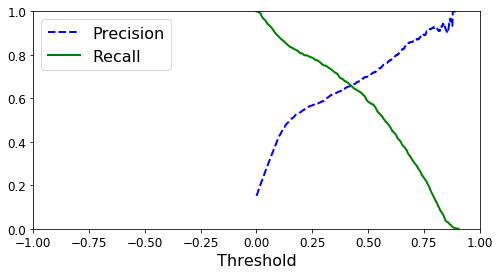

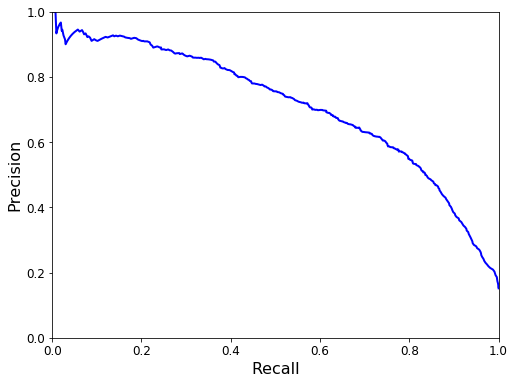

In [1289]:
plot_precision_recall_curves(bag_clf,
                             X_train_trees, y_train,
                             method='predict_proba',
                             xlim=[-1,1])

### Random Forests

In [1308]:
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=6,
                                 random_state=42)
rnd_clf.fit(X_train_trees, y_train)

rnd_clf_time = (time.time() - start_time)
print('Running Time: {}\n'.format(datetime.timedelta(seconds=rnd_clf_time)))

print(rnd_clf)

Running Time: 0:00:00.670612

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [1309]:
model_evaluation_metrics(rnd_clf,
                         X_train_trees, y_train)

Confusion Matrix:
[[8155  212]
 [ 739  758]]

CV Scores:
CV Accuracy Score: 0.9035888077858881
CV Precision Score: 0.7814432989690722
CV Recall Score: 0.5063460253841016
CV F1 Score: 0.6145115524929063

Non-CV Scores:
Non-CV Accuracy Score: 0.9185928629359287
Non-CV Precision Score: 0.8435643564356435
Non-CV Recall Score: 0.5691382765531062
Non-CV F1 Score: 0.6796968488232947


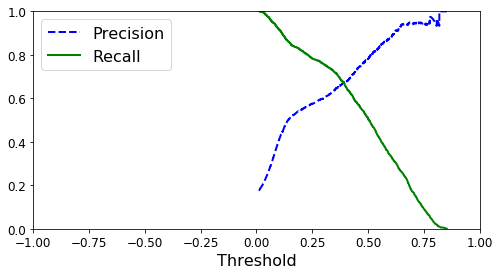

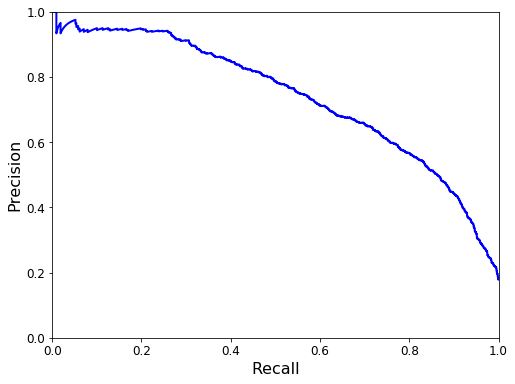

In [1310]:
plot_precision_recall_curves(rnd_clf,
                             X_train_trees, y_train,
                             method='predict_proba',
                             xlim=[-1,1])

#### Random Forest Grid Search

In [1312]:
start_time = time.time()

forest_clf_grid = RandomForestClassifier(random_state=42)

forest_param_grid = [
    {
     'n_estimators': [10, 100, 200, 500],
     'max_depth': [1, 2, 3, 5, 7, 10],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.5],
     'max_leaf_nodes': [None, 2, 5, 20],
    }
]

forest_grid_search = model_grid_search(forest_clf_grid,
                  X_train_trees, y_train,
                  forest_param_grid)

forest_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=forest_time)))

Running Time: 0:21:37.535886

Best Parameters:
 {'max_depth': 10, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}

Best Estimator:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

f1 Test Scores:

Best Test Score: 0.6420388581440739

0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}


In [1313]:
model_evaluation_metrics(forest_grid_search.best_estimator_,
                         X_train_trees,
                         y_train)

Confusion Matrix:
[[8100  267]
 [ 663  834]]

CV Scores:
CV Accuracy Score: 0.9057177615571776
CV Precision Score: 0.7574931880108992
CV Recall Score: 0.5571142284569138
CV F1 Score: 0.6420323325635104

Non-CV Scores:
Non-CV Accuracy Score: 0.9511354420113545
Non-CV Precision Score: 0.9311809685641461
Non-CV Recall Score: 0.7321309285237141
Non-CV F1 Score: 0.8197456993268512


In [1314]:
final_forest_clf = forest_grid_search.best_estimator_

#### Extra-Trees Classifier Grid Search

In [60]:
start_time = time.time()

from sklearn.ensemble import ExtraTreesClassifier

extra_trees_clf_grid = ExtraTreesClassifier(n_jobs=-1, random_state=42).fit(shopping_prepared, shopping_labels)

extra_trees_param_grid = [
    {
     'n_estimators': [10, 100, 200, 500],
     'max_depth': [1, 2, 3, 5, 7, 10],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.5],
     'max_leaf_nodes': [None, 2, 5, 20],
    }
]

extra_trees_grid_search = model_grid_search(extra_trees_clf_grid,
                  shopping_prepared, shopping_labels,
                  extra_trees_param_grid)

extra_trees_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=extra_trees_time)))

/Users/Gregs_Computer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Running Time: 0:16:59.884356

Best Parameters:
 {'max_depth': 100, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}

Best Estimator:
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=100, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

f1 Test Scores:

Best Test Score: 0.4733062478296162

0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 3}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estim

### CatBoost

In [1324]:
# View the data for the CatBoost model
catboost_X_train = shopping_prepared.copy(deep=True)
# OrdinalEncoder SpecialDay to appease CatBoost
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
SpecialDay_enc = ord_enc.fit_transform(np.array(catboost_X_train['SpecialDay']).reshape(-1, 1))
catboost_X_train['SpecialDay'] = SpecialDay_enc
catboost_X_train.head()

Administrative  Administrative_Duration  Informational  \
1785                0                      0.0              0   
10407               2                     14.0              0   
286                 0                      0.0              0   
6520                5                     49.2              4   
12251               0                      0.0              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1785                      0.0               7                95.000000   
10407                     0.0              81              1441.910588   
286                       0.0               1                 0.000000   
6520                    379.0               5                74.600000   
12251                     5.0               9               279.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1785      0.014286   0.061905    0.000000         0.0   Mar                 2   
10407     0.002469   0.013933    2.769599         0.0   Nov                 2   
286       0.200000   0.200000    0.000000         0.0   Mar                 2   
6520      0.000000   0.018182    8.326728         0.0   Sep                 2   
12251     0.040000   0.041667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  
1785         6       1            1  Returning_Visitor        0  
10407        2       3            2  Returning_Visitor        0  
286          2       1            1  Returning_Visitor        0  
6520         2       8            2        New_Visitor        0  
12251        2       7            8        New_Visitor        1

In [1325]:
# Generate list of categorical feature names
catboost_categoricals = cat_attribs
catboost_categoricals

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'SpecialDay']

In [1326]:
# Use the CatBoost Pool() function to pool together the training
# data and categorical feature labels.
import catboost
from catboost import CatBoostClassifier, Pool, cv

train_pool = Pool(catboost_X_train,
                  y_train,
                  catboost_categoricals)

In [1327]:
# CatBoost model definition

catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy',
                                                 'Precision',
                                                 'Recall',
                                                 'F1',
                                                 'AUC'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = catboost_model.score(catboost_X_train,
                                    y_train)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032021


0:	learn: 0.6539422	total: 358ms	remaining: 5m 57s
1:	learn: 0.6200692	total: 502ms	remaining: 4m 10s
2:	learn: 0.5903879	total: 620ms	remaining: 3m 26s
3:	learn: 0.5613083	total: 743ms	remaining: 3m 4s
4:	learn: 0.5349133	total: 850ms	remaining: 2m 49s
5:	learn: 0.5151025	total: 952ms	remaining: 2m 37s
6:	learn: 0.4926259	total: 1.17s	remaining: 2m 45s
7:	learn: 0.4723189	total: 1.33s	remaining: 2m 44s
8:	learn: 0.4532474	total: 1.52s	remaining: 2m 47s
9:	learn: 0.4375444	total: 1.67s	remaining: 2m 45s
10:	learn: 0.4221718	total: 1.8s	remaining: 2m 41s
11:	learn: 0.4073771	total: 1.95s	remaining: 2m 40s
12:	learn: 0.3941061	total: 2.12s	remaining: 2m 40s
13:	learn: 0.3835133	total: 2.28s	remaining: 2m 40s
14:	learn: 0.3722145	total: 2.42s	remaining: 2m 38s
15:	learn: 0.3640255	total: 2.54s	remaining: 2m 36s
16:	learn: 0.3548297	total: 2.69s	remaining: 2m 35s
17:	learn: 0.3441559	total: 2.84s	remaining: 2m 35s
18:	learn: 0.3368140	total: 2.96s	remaining: 2m 32s
19:	learn: 0.3312727	tot

159:	learn: 0.2164036	total: 18.3s	remaining: 1m 36s
160:	learn: 0.2163810	total: 18.4s	remaining: 1m 35s
161:	learn: 0.2163314	total: 18.5s	remaining: 1m 35s
162:	learn: 0.2162818	total: 18.5s	remaining: 1m 35s
163:	learn: 0.2161885	total: 18.7s	remaining: 1m 35s
164:	learn: 0.2161487	total: 18.8s	remaining: 1m 34s
165:	learn: 0.2161486	total: 18.8s	remaining: 1m 34s
166:	learn: 0.2161070	total: 19s	remaining: 1m 34s
167:	learn: 0.2159850	total: 19.1s	remaining: 1m 34s
168:	learn: 0.2158622	total: 19.2s	remaining: 1m 34s
169:	learn: 0.2158461	total: 19.3s	remaining: 1m 34s
170:	learn: 0.2150298	total: 19.4s	remaining: 1m 33s
171:	learn: 0.2148527	total: 19.4s	remaining: 1m 33s
172:	learn: 0.2147969	total: 19.6s	remaining: 1m 33s
173:	learn: 0.2147923	total: 19.6s	remaining: 1m 33s
174:	learn: 0.2147841	total: 19.7s	remaining: 1m 33s
175:	learn: 0.2146333	total: 19.8s	remaining: 1m 32s
176:	learn: 0.2145933	total: 19.9s	remaining: 1m 32s
177:	learn: 0.2145601	total: 20s	remaining: 1m 3

315:	learn: 0.2064943	total: 32.3s	remaining: 1m 9s
316:	learn: 0.2064904	total: 32.4s	remaining: 1m 9s
317:	learn: 0.2064065	total: 32.6s	remaining: 1m 9s
318:	learn: 0.2063205	total: 32.7s	remaining: 1m 9s
319:	learn: 0.2062249	total: 32.7s	remaining: 1m 9s
320:	learn: 0.2061324	total: 32.9s	remaining: 1m 9s
321:	learn: 0.2059684	total: 33s	remaining: 1m 9s
322:	learn: 0.2059348	total: 33.1s	remaining: 1m 9s
323:	learn: 0.2059318	total: 33.2s	remaining: 1m 9s
324:	learn: 0.2058691	total: 33.3s	remaining: 1m 9s
325:	learn: 0.2057537	total: 33.5s	remaining: 1m 9s
326:	learn: 0.2055908	total: 33.6s	remaining: 1m 9s
327:	learn: 0.2054150	total: 33.7s	remaining: 1m 9s
328:	learn: 0.2052831	total: 33.8s	remaining: 1m 9s
329:	learn: 0.2051623	total: 34s	remaining: 1m 9s
330:	learn: 0.2050456	total: 34.1s	remaining: 1m 8s
331:	learn: 0.2050111	total: 34.2s	remaining: 1m 8s
332:	learn: 0.2048697	total: 34.3s	remaining: 1m 8s
333:	learn: 0.2048562	total: 34.5s	remaining: 1m 8s
334:	learn: 0.20

474:	learn: 0.1953303	total: 47.8s	remaining: 52.8s
475:	learn: 0.1953163	total: 47.8s	remaining: 52.7s
476:	learn: 0.1952270	total: 47.9s	remaining: 52.5s
477:	learn: 0.1951771	total: 48s	remaining: 52.4s
478:	learn: 0.1951524	total: 48.1s	remaining: 52.3s
479:	learn: 0.1951243	total: 48.2s	remaining: 52.2s
480:	learn: 0.1949636	total: 48.3s	remaining: 52.1s
481:	learn: 0.1948760	total: 48.4s	remaining: 52s
482:	learn: 0.1948411	total: 48.5s	remaining: 51.9s
483:	learn: 0.1947250	total: 48.6s	remaining: 51.8s
484:	learn: 0.1946624	total: 48.7s	remaining: 51.7s
485:	learn: 0.1946551	total: 48.8s	remaining: 51.6s
486:	learn: 0.1945504	total: 48.9s	remaining: 51.5s
487:	learn: 0.1944840	total: 48.9s	remaining: 51.4s
488:	learn: 0.1944298	total: 49s	remaining: 51.2s
489:	learn: 0.1943171	total: 49.1s	remaining: 51.1s
490:	learn: 0.1942184	total: 49.2s	remaining: 51s
491:	learn: 0.1941309	total: 49.3s	remaining: 50.9s
492:	learn: 0.1940908	total: 49.4s	remaining: 50.8s
493:	learn: 0.193984

635:	learn: 0.1881737	total: 1m 6s	remaining: 38.3s
636:	learn: 0.1881548	total: 1m 7s	remaining: 38.2s
637:	learn: 0.1880682	total: 1m 7s	remaining: 38.1s
638:	learn: 0.1880575	total: 1m 7s	remaining: 38.1s
639:	learn: 0.1879326	total: 1m 7s	remaining: 38s
640:	learn: 0.1879165	total: 1m 7s	remaining: 37.8s
641:	learn: 0.1878922	total: 1m 7s	remaining: 37.8s
642:	learn: 0.1878664	total: 1m 7s	remaining: 37.7s
643:	learn: 0.1878391	total: 1m 8s	remaining: 37.6s
644:	learn: 0.1878167	total: 1m 8s	remaining: 37.5s
645:	learn: 0.1878077	total: 1m 8s	remaining: 37.4s
646:	learn: 0.1877717	total: 1m 8s	remaining: 37.3s
647:	learn: 0.1877058	total: 1m 8s	remaining: 37.1s
648:	learn: 0.1876906	total: 1m 8s	remaining: 37.1s
649:	learn: 0.1876656	total: 1m 8s	remaining: 37s
650:	learn: 0.1876304	total: 1m 8s	remaining: 36.9s
651:	learn: 0.1876144	total: 1m 8s	remaining: 36.8s
652:	learn: 0.1876084	total: 1m 9s	remaining: 36.7s
653:	learn: 0.1875481	total: 1m 9s	remaining: 36.6s
654:	learn: 0.18

791:	learn: 0.1820959	total: 1m 25s	remaining: 22.5s
792:	learn: 0.1820631	total: 1m 25s	remaining: 22.3s
793:	learn: 0.1820148	total: 1m 25s	remaining: 22.2s
794:	learn: 0.1820071	total: 1m 25s	remaining: 22.1s
795:	learn: 0.1819898	total: 1m 26s	remaining: 22s
796:	learn: 0.1818342	total: 1m 26s	remaining: 21.9s
797:	learn: 0.1818176	total: 1m 26s	remaining: 21.8s
798:	learn: 0.1817577	total: 1m 26s	remaining: 21.7s
799:	learn: 0.1816138	total: 1m 26s	remaining: 21.6s
800:	learn: 0.1815634	total: 1m 26s	remaining: 21.5s
801:	learn: 0.1815531	total: 1m 26s	remaining: 21.4s
802:	learn: 0.1815375	total: 1m 26s	remaining: 21.3s
803:	learn: 0.1815059	total: 1m 27s	remaining: 21.2s
804:	learn: 0.1814868	total: 1m 27s	remaining: 21.1s
805:	learn: 0.1814270	total: 1m 27s	remaining: 21s
806:	learn: 0.1813347	total: 1m 27s	remaining: 20.9s
807:	learn: 0.1812590	total: 1m 27s	remaining: 20.8s
808:	learn: 0.1812387	total: 1m 27s	remaining: 20.7s
809:	learn: 0.1811429	total: 1m 27s	remaining: 20.

948:	learn: 0.1765796	total: 1m 45s	remaining: 5.69s
949:	learn: 0.1765717	total: 1m 45s	remaining: 5.57s
950:	learn: 0.1765308	total: 1m 46s	remaining: 5.46s
951:	learn: 0.1764953	total: 1m 46s	remaining: 5.35s
952:	learn: 0.1764517	total: 1m 46s	remaining: 5.24s
953:	learn: 0.1764507	total: 1m 46s	remaining: 5.13s
954:	learn: 0.1764244	total: 1m 46s	remaining: 5.02s
955:	learn: 0.1764225	total: 1m 46s	remaining: 4.91s
956:	learn: 0.1764040	total: 1m 46s	remaining: 4.79s
957:	learn: 0.1764031	total: 1m 46s	remaining: 4.68s
958:	learn: 0.1763872	total: 1m 46s	remaining: 4.57s
959:	learn: 0.1763863	total: 1m 47s	remaining: 4.46s
960:	learn: 0.1763671	total: 1m 47s	remaining: 4.35s
961:	learn: 0.1763487	total: 1m 47s	remaining: 4.24s
962:	learn: 0.1763416	total: 1m 47s	remaining: 4.13s
963:	learn: 0.1763016	total: 1m 47s	remaining: 4.01s
964:	learn: 0.1762879	total: 1m 47s	remaining: 3.9s
965:	learn: 0.1762726	total: 1m 47s	remaining: 3.79s
966:	learn: 0.1762404	total: 1m 47s	remaining: 

In [1329]:
# Non-CV CatBoost Accuracy
acc_catboost

0.9273114355231143

In [1330]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross_validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation
from catboost import cv

catboost_cv = cv(train_pool,
                 cv_params,
                 fold_count=10,
                 plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results into a dataframe (cv_data), let's withdraw
# the accuracy data
acc_cv_catboost = np.max(catboost_cv['test-Accuracy-mean'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6579050	test: 0.6579044	best: 0.6579044 (0)	total: 1.56s	remaining: 25m 57s
1:	learn: 0.6262360	test: 0.6263433	best: 0.6263433 (1)
2:	learn: 0.5961060	test: 0.5963012	best: 0.5963012 (2)
3:	learn: 0.5699650	test: 0.5702137	best: 0.5702137 (3)
4:	learn: 0.5453627	test: 0.5457003	best: 0.5457003 (4)
5:	learn: 0.5219861	test: 0.5224041	best: 0.5224041 (5)
6:	learn: 0.4999410	test: 0.5005321	best: 0.5005321 (6)
7:	learn: 0.4813469	test: 0.4819043	best: 0.4819043 (7)
8:	learn: 0.4637238	test: 0.4645245	best: 0.4645245 (8)
9:	learn: 0.4469134	test: 0.4479194	best: 0.4479194 (9)
10:	learn: 0.4319260	test: 0.4329931	best: 0.4329931 (10)
11:	learn: 0.4182785	test: 0.4193523	best: 0.4193523 (11)
12:	learn: 0.4051304	test: 0.4062781	best: 0.4062781 (12)
13:	learn: 0.3936332	test: 0.3948528	best: 0.3948528 (13)
14:	learn: 0.3827692	test: 0.3840213	best: 0.3840213 (14)
15:	learn: 0.3726652	test: 0.3739714	best: 0.3739714 (15)
16:	learn: 0.3635108	test: 0.3648765	best: 0.3648765 (16)
17

329:	learn: 0.2072023	test: 0.2237813	best: 0.2237813 (329)
330:	learn: 0.2071257	test: 0.2237653	best: 0.2237653 (330)
331:	learn: 0.2070621	test: 0.2237388	best: 0.2237388 (331)
332:	learn: 0.2070101	test: 0.2237303	best: 0.2237303 (332)
333:	learn: 0.2069443	test: 0.2237193	best: 0.2237193 (333)
334:	learn: 0.2068299	test: 0.2236806	best: 0.2236806 (334)
335:	learn: 0.2067611	test: 0.2236758	best: 0.2236758 (335)
336:	learn: 0.2066720	test: 0.2236661	best: 0.2236661 (336)
337:	learn: 0.2066084	test: 0.2236613	best: 0.2236613 (337)
338:	learn: 0.2065461	test: 0.2236788	best: 0.2236613 (337)
339:	learn: 0.2064847	test: 0.2236735	best: 0.2236613 (337)
340:	learn: 0.2064064	test: 0.2236400	best: 0.2236400 (340)
341:	learn: 0.2063138	test: 0.2236137	best: 0.2236137 (341)
342:	learn: 0.2062451	test: 0.2235865	best: 0.2235865 (342)
343:	learn: 0.2061985	test: 0.2235718	best: 0.2235718 (343)
344:	learn: 0.2061343	test: 0.2235315	best: 0.2235315 (344)
345:	learn: 0.2060425	test: 0.2235259	be

586:	learn: 0.1911632	test: 0.2218525	best: 0.2218426 (573)
587:	learn: 0.1911014	test: 0.2218641	best: 0.2218426 (573)
588:	learn: 0.1910246	test: 0.2218726	best: 0.2218426 (573)
589:	learn: 0.1909999	test: 0.2218506	best: 0.2218426 (573)
590:	learn: 0.1909465	test: 0.2218368	best: 0.2218368 (590)
591:	learn: 0.1908955	test: 0.2218268	best: 0.2218268 (591)
592:	learn: 0.1908568	test: 0.2218246	best: 0.2218246 (592)
593:	learn: 0.1908176	test: 0.2218167	best: 0.2218167 (593)
594:	learn: 0.1907666	test: 0.2218207	best: 0.2218167 (593)
595:	learn: 0.1907222	test: 0.2218204	best: 0.2218167 (593)
596:	learn: 0.1906748	test: 0.2218271	best: 0.2218167 (593)
597:	learn: 0.1906382	test: 0.2218533	best: 0.2218167 (593)
598:	learn: 0.1906092	test: 0.2218523	best: 0.2218167 (593)
599:	learn: 0.1905438	test: 0.2218327	best: 0.2218167 (593)
600:	learn: 0.1904912	test: 0.2218344	best: 0.2218167 (593)
601:	learn: 0.1904543	test: 0.2218451	best: 0.2218167 (593)
602:	learn: 0.1904365	test: 0.2218615	be

843:	learn: 0.1814646	test: 0.2220666	best: 0.2217870 (633)
844:	learn: 0.1814257	test: 0.2220943	best: 0.2217870 (633)
845:	learn: 0.1814004	test: 0.2220713	best: 0.2217870 (633)
846:	learn: 0.1813810	test: 0.2220716	best: 0.2217870 (633)
847:	learn: 0.1813579	test: 0.2220758	best: 0.2217870 (633)
848:	learn: 0.1813134	test: 0.2220748	best: 0.2217870 (633)
849:	learn: 0.1812970	test: 0.2220688	best: 0.2217870 (633)
850:	learn: 0.1812778	test: 0.2220692	best: 0.2217870 (633)
851:	learn: 0.1812399	test: 0.2220678	best: 0.2217870 (633)
852:	learn: 0.1812199	test: 0.2220699	best: 0.2217870 (633)
853:	learn: 0.1811993	test: 0.2220741	best: 0.2217870 (633)
854:	learn: 0.1811661	test: 0.2220798	best: 0.2217870 (633)
855:	learn: 0.1811413	test: 0.2220926	best: 0.2217870 (633)
856:	learn: 0.1811058	test: 0.2221077	best: 0.2217870 (633)
857:	learn: 0.1810713	test: 0.2221110	best: 0.2217870 (633)
858:	learn: 0.1810273	test: 0.2221210	best: 0.2217870 (633)
859:	learn: 0.1810086	test: 0.2221305	be

In [1331]:
catboost_cv.tail(10)

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
990         990           0.222464          0.008556            0.177344   
991         991           0.222472          0.008558            0.177309   
992         992           0.222484          0.008542            0.177269   
993         993           0.222491          0.008541            0.177248   
994         994           0.222493          0.008535            0.177219   
995         995           0.222483          0.008541            0.177184   
996         996           0.222494          0.008542            0.177148   
997         997           0.222498          0.008541            0.177138   
998         998           0.222505          0.008538            0.177107   
999         999           0.222510          0.008538            0.177087   

     train-Logloss-std  test-Accuracy-mean  test-Accuracy-std  \
990           0.002380            0.903184           0.005272   
991           0.002386            0.903184           0.005272   
992           0.002384            0.903184           0.005272   
993           0.002392            0.903184           0.005272   
994           0.002410            0.903488           0.005175   
995           0.002413            0.903488           0.005193   
996           0.002409            0.903589           0.005402   
997           0.002414            0.903488           0.005344   
998           0.002429            0.903285           0.005375   
999           0.002424            0.903387           0.005309   

     train-Accuracy-mean  train-Accuracy-std  test-Precision-mean  ...  \
990             0.931378            0.001232             0.726332  ...   
991             0.931445            0.001282             0.726332  ...   
992             0.931423            0.001229             0.726332  ...   
993             0.931400            0.001255             0.726332  ...   
994             0.931434            0.001314             0.727035  ...   
995             0.931389            0.001272             0.727027  ...   
996             0.931412            0.001300             0.727214  ...   
997             0.931400            0.001317             0.726673  ...   
998             0.931479            0.001279             0.726212  ...   
999             0.931479            0.001176             0.726453  ...   

     test-Recall-mean  test-Recall-std  train-Recall-mean  train-Recall-std  \
990          0.583177         0.027985           0.688414          0.005774   
991          0.583177         0.027985           0.688637          0.005860   
992          0.583177         0.027985           0.688711          0.005521   
993          0.583177         0.027985           0.688711          0.005601   
994          0.585181         0.027136           0.688785          0.005876   
995          0.585186         0.028661           0.688489          0.006048   
996          0.585852         0.028432           0.688637          0.005936   
997          0.585852         0.028432           0.688637          0.005936   
998          0.584515         0.028242           0.688934          0.005899   
999          0.585181         0.027131           0.689008          0.005462   

     test-F1-mean  test-F1-std  train-F1-mean  train-F1-std  test-AUC-mean  \
990      0.646284     0.019511       0.752777      0.004468       0.933906   
991      0.646284     0.019511       0.753020      0.004662       0.933902   
992      0.646284     0.019511       0.752980      0.004389       0.933902   
993      0.646284     0.019511       0.752919      0.004520       0.933898   
994      0.647806     0.018751       0.753030      0.004756       0.933885   
995      0.647768     0.019488       0.752826      0.004654       0.933888   
996      0.648283     0.020101       0.752928      0.004726       0.933887   
997      0.648045     0.019777       0.752898      0.004762       0.933882   
998      0.647050     0.019839       0.753192      0.004632      

In [1345]:
f1_catboost_cv = catboost_cv['test-F1-mean'].iloc[462]
precision_catboost_cv = catboost_cv['test-Precision-mean'].iloc[462]
recall_catboost_cv = catboost_cv['test-Recall-mean'].iloc[462]
accuracy_catboost_cv = catboost_cv['test-Precision-mean'].iloc[462]

#### Catboost Metrics

In [1351]:
# Print out the CatBoost CV model metrics
print('CatBoost CV Metrics:\n')
print('F1-Score CV: {}'.format(f1_catboost_cv))
print('Precision CV: {}'.format(precision_catboost_cv))
print('Recall CV: {}'.format(recall_catboost_cv))
print('Accuracy CV: {}'.format(accuracy_catboost_cv))
print('Running Time: {}'.format(datetime.timedelta(seconds=catboost_time)))

# Catboost Metrics
def catboost_metrics(catboost_model, train_pool, metrics,
                     plot=False):    
    catboost_eval_metrics = catboost_model.eval_metrics(train_pool,
                                                        metrics=metrics,
                                                        plot=plot)
    print('\nCatboost Evaluation Metrics:\n')
    for metric in metrics:
        print(str(metric)+': {}'.format(np.mean(catboost_eval_metrics[metric])))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
catboost_metrics(catboost_model, train_pool, metrics)

---CatBoost CV Metrics---
F1-Score CV: 0.6549913498376961
Precision CV: 0.7290060079214133
Recall CV: 0.5958702460850112
Accuracy CV: 0.7290060079214133
Running Time: 0:19:45.986335

Catboost Evaluation Metrics:

Accuracy: 0.9171296634225468
Precision: 0.7757969732411681
Recall: 0.6384575818303274
F1: 0.7004477880470086
AUC: 0.9459132466758144


Our CatBoost model is the best predictor with a CV F1-Score of 0.654, so we will use this as our model. First, we will analyze the model's feature importances, and then we will evaluate the model on the test set.

# Feature Importance (CatBoost)

In [1352]:
# Feature Importance
def feature_importance(model, data):
    '''
    Function to show which features are most important in the model.
    '''
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
    fea_imp_bar = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20,10))
    return fea_imp

imp                      col
16   0.231243                  Weekend
2    0.354728            Informational
12   0.469416                  Browser
11   0.879467         OperatingSystems
3    1.453832   Informational_Duration
13   1.535651                   Region
15   2.211989              VisitorType
14   2.633850              TrafficType
0    3.041217           Administrative
6    3.150207              BounceRates
9    3.449314               SpecialDay
1    3.463722  Administrative_Duration
4    5.331965           ProductRelated
5    5.446029  ProductRelated_Duration
7    7.408528                ExitRates
8   27.949225               PageValues
10  30.989617                    Month

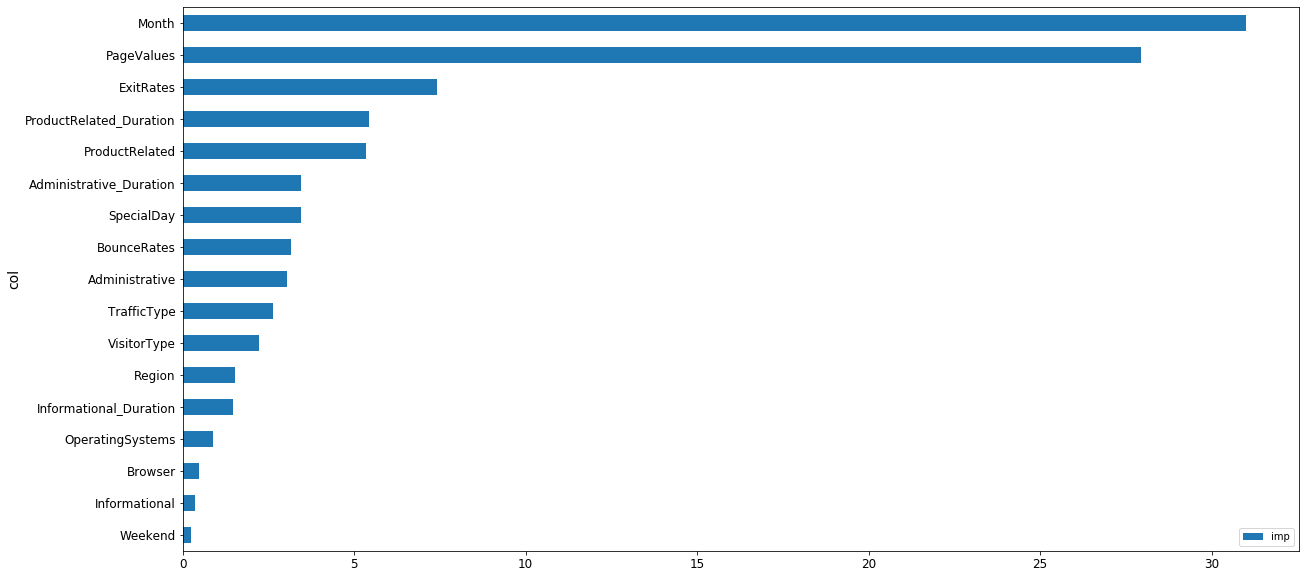

In [1354]:
# Plot the feature importance scores
feature_importance(catboost_model, catboost_X_train)

# Evaluate the System on the Test Set (CatBoost)

In [1414]:
# Define X_test and y_test
shopping_test_prepared = clean_shopping(shopping_test)
#X_test = full_pipeline_trees.transform(shopping_test_prepared)
y_test = shopping_test_prepared['Revenue']
shopping_test_prepared.drop('Revenue', axis=1, inplace=True)
catboost_X_test = shopping_test_prepared.copy(deep=True)

# OrdinalEncoder SpecialDay to appease CatBoost (same process as train set)
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
SpecialDay_enc_test = ord_enc.fit_transform(np.array(catboost_X_test['SpecialDay']).reshape(-1, 1))
catboost_X_test['SpecialDay'] = SpecialDay_enc_test
# Check X_test
catboost_X_test.head()

Administrative  Administrative_Duration  Informational  \
8916                3               142.500000              0   
772                 6               437.391304              2   
12250               1                41.125000              0   
7793                2               141.000000              0   
6601               18               608.140000              6   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
8916                     0.00              48              1052.255952   
772                    235.55              83              2503.881781   
12250                    0.00             126              4310.004668   
7793                     0.00              10               606.666667   
6601                   733.80             168              4948.398759   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
8916      0.004348   0.013043    0.000000         0.0   Nov                 1   
772       0.002198   0.004916    2.086218         0.0   Mar                 2   
12250     0.000688   0.012823    3.451072         0.0   Nov                 2   
7793      0.008333   0.026389   36.672294         0.0   Aug                 2   
6601      0.006632   0.013528   10.150644         0.0   Aug                 2   

       Browser  Region  TrafficType        VisitorType  Weekend  
8916         8       6           11  Returning_Visitor        0  
772          2       3            2  Returning_Visitor        0  
12250        2       2            2  Returning_Visitor        0  
7793         5       7            4  Returning_Visitor        0  
6601         2       3            1  Returning_Visitor        1

In [1416]:
# Generate list of categorical feature names
catboost_categoricals_final = cat_attribs

# CatBoost Pool() function
train_pool_final = Pool(catboost_X_test,
                        y_test,
                        catboost_categoricals_final)

# Define final model
final_model = catboost_model

# Fit final model
final_model.fit(train_pool_final,
                plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.02163


0:	learn: 0.6689241	total: 216ms	remaining: 3m 36s
1:	learn: 0.6461088	total: 490ms	remaining: 4m 4s
2:	learn: 0.6249591	total: 629ms	remaining: 3m 28s
3:	learn: 0.6046555	total: 732ms	remaining: 3m 2s
4:	learn: 0.5878072	total: 910ms	remaining: 3m 1s
5:	learn: 0.5688761	total: 1.17s	remaining: 3m 13s
6:	learn: 0.5507847	total: 1.38s	remaining: 3m 15s
7:	learn: 0.5354073	total: 1.6s	remaining: 3m 17s
8:	learn: 0.5194065	total: 1.72s	remaining: 3m 9s
9:	learn: 0.5054988	total: 1.87s	remaining: 3m 4s
10:	learn: 0.4916407	total: 1.99s	remaining: 2m 59s
11:	learn: 0.4796201	total: 2.12s	remaining: 2m 54s
12:	learn: 0.4680678	total: 2.23s	remaining: 2m 49s
13:	learn: 0.4584177	total: 2.37s	remaining: 2m 46s
14:	learn: 0.4491340	total: 2.48s	remaining: 2m 42s
15:	learn: 0.4395483	total: 2.62s	remaining: 2m 41s
16:	learn: 0.4315565	total: 2.71s	remaining: 2m 36s
17:	learn: 0.4242529	total: 2.84s	remaining: 2m 34s
18:	learn: 0.4134530	total: 2.96s	remaining: 2m 33s
19:	learn: 0.4057674	total: 

160:	learn: 0.2368693	total: 19.3s	remaining: 1m 40s
161:	learn: 0.2367021	total: 19.4s	remaining: 1m 40s
162:	learn: 0.2363401	total: 19.5s	remaining: 1m 40s
163:	learn: 0.2358924	total: 19.6s	remaining: 1m 40s
164:	learn: 0.2354763	total: 19.8s	remaining: 1m 40s
165:	learn: 0.2350810	total: 19.9s	remaining: 1m 40s
166:	learn: 0.2350809	total: 20s	remaining: 1m 39s
167:	learn: 0.2347716	total: 20.2s	remaining: 1m 39s
168:	learn: 0.2346704	total: 20.4s	remaining: 1m 40s
169:	learn: 0.2343514	total: 20.7s	remaining: 1m 40s
170:	learn: 0.2342435	total: 20.9s	remaining: 1m 41s
171:	learn: 0.2340875	total: 21s	remaining: 1m 40s
172:	learn: 0.2337389	total: 21.2s	remaining: 1m 41s
173:	learn: 0.2336009	total: 21.3s	remaining: 1m 41s
174:	learn: 0.2335438	total: 21.4s	remaining: 1m 40s
175:	learn: 0.2335207	total: 21.5s	remaining: 1m 40s
176:	learn: 0.2334552	total: 21.5s	remaining: 1m 40s
177:	learn: 0.2333591	total: 21.6s	remaining: 1m 39s
178:	learn: 0.2333018	total: 21.7s	remaining: 1m 3

316:	learn: 0.2167464	total: 36.8s	remaining: 1m 19s
317:	learn: 0.2166701	total: 37s	remaining: 1m 19s
318:	learn: 0.2165641	total: 37.2s	remaining: 1m 19s
319:	learn: 0.2165358	total: 37.4s	remaining: 1m 19s
320:	learn: 0.2163368	total: 37.5s	remaining: 1m 19s
321:	learn: 0.2162381	total: 37.6s	remaining: 1m 19s
322:	learn: 0.2161755	total: 37.6s	remaining: 1m 18s
323:	learn: 0.2160588	total: 37.8s	remaining: 1m 18s
324:	learn: 0.2157472	total: 37.9s	remaining: 1m 18s
325:	learn: 0.2155893	total: 38s	remaining: 1m 18s
326:	learn: 0.2154800	total: 38.1s	remaining: 1m 18s
327:	learn: 0.2152154	total: 38.2s	remaining: 1m 18s
328:	learn: 0.2151224	total: 38.4s	remaining: 1m 18s
329:	learn: 0.2150874	total: 38.5s	remaining: 1m 18s
330:	learn: 0.2150873	total: 38.6s	remaining: 1m 18s
331:	learn: 0.2150398	total: 38.7s	remaining: 1m 17s
332:	learn: 0.2149214	total: 38.9s	remaining: 1m 17s
333:	learn: 0.2148910	total: 39s	remaining: 1m 17s
334:	learn: 0.2146989	total: 39.1s	remaining: 1m 17s

474:	learn: 0.1937544	total: 57.1s	remaining: 1m 3s
475:	learn: 0.1936193	total: 57.2s	remaining: 1m 3s
476:	learn: 0.1934493	total: 57.3s	remaining: 1m 2s
477:	learn: 0.1932839	total: 57.4s	remaining: 1m 2s
478:	learn: 0.1931506	total: 57.6s	remaining: 1m 2s
479:	learn: 0.1929939	total: 57.7s	remaining: 1m 2s
480:	learn: 0.1928039	total: 57.8s	remaining: 1m 2s
481:	learn: 0.1926425	total: 57.9s	remaining: 1m 2s
482:	learn: 0.1925613	total: 58s	remaining: 1m 2s
483:	learn: 0.1924894	total: 58.1s	remaining: 1m 1s
484:	learn: 0.1923404	total: 58.3s	remaining: 1m 1s
485:	learn: 0.1921366	total: 58.3s	remaining: 1m 1s
486:	learn: 0.1921133	total: 58.4s	remaining: 1m 1s
487:	learn: 0.1919579	total: 58.5s	remaining: 1m 1s
488:	learn: 0.1918852	total: 58.6s	remaining: 1m 1s
489:	learn: 0.1917895	total: 58.7s	remaining: 1m 1s
490:	learn: 0.1916233	total: 58.8s	remaining: 1m
491:	learn: 0.1912934	total: 58.9s	remaining: 1m
492:	learn: 0.1910457	total: 59s	remaining: 1m
493:	learn: 0.1908554	tot

633:	learn: 0.1750686	total: 1m 16s	remaining: 44.1s
634:	learn: 0.1749342	total: 1m 16s	remaining: 44s
635:	learn: 0.1748795	total: 1m 16s	remaining: 43.9s
636:	learn: 0.1747984	total: 1m 16s	remaining: 43.8s
637:	learn: 0.1746917	total: 1m 16s	remaining: 43.6s
638:	learn: 0.1744979	total: 1m 16s	remaining: 43.4s
639:	learn: 0.1743816	total: 1m 16s	remaining: 43.3s
640:	learn: 0.1742093	total: 1m 17s	remaining: 43.2s
641:	learn: 0.1741780	total: 1m 17s	remaining: 43s
642:	learn: 0.1740190	total: 1m 17s	remaining: 42.9s
643:	learn: 0.1737545	total: 1m 17s	remaining: 42.8s
644:	learn: 0.1736734	total: 1m 17s	remaining: 42.7s
645:	learn: 0.1736082	total: 1m 17s	remaining: 42.5s
646:	learn: 0.1734535	total: 1m 17s	remaining: 42.4s
647:	learn: 0.1733872	total: 1m 17s	remaining: 42.3s
648:	learn: 0.1733272	total: 1m 17s	remaining: 42.1s
649:	learn: 0.1732780	total: 1m 18s	remaining: 42s
650:	learn: 0.1732620	total: 1m 18s	remaining: 41.9s
651:	learn: 0.1731877	total: 1m 18s	remaining: 41.7s

789:	learn: 0.1622151	total: 1m 32s	remaining: 24.7s
790:	learn: 0.1619491	total: 1m 32s	remaining: 24.5s
791:	learn: 0.1619057	total: 1m 33s	remaining: 24.4s
792:	learn: 0.1618286	total: 1m 33s	remaining: 24.3s
793:	learn: 0.1617832	total: 1m 33s	remaining: 24.2s
794:	learn: 0.1617784	total: 1m 33s	remaining: 24.1s
795:	learn: 0.1617096	total: 1m 33s	remaining: 24s
796:	learn: 0.1616038	total: 1m 33s	remaining: 23.8s
797:	learn: 0.1615646	total: 1m 33s	remaining: 23.7s
798:	learn: 0.1615034	total: 1m 33s	remaining: 23.6s
799:	learn: 0.1614602	total: 1m 34s	remaining: 23.5s
800:	learn: 0.1613852	total: 1m 34s	remaining: 23.4s
801:	learn: 0.1613779	total: 1m 34s	remaining: 23.3s
802:	learn: 0.1612852	total: 1m 34s	remaining: 23.1s
803:	learn: 0.1611788	total: 1m 34s	remaining: 23s
804:	learn: 0.1610239	total: 1m 34s	remaining: 22.9s
805:	learn: 0.1610109	total: 1m 34s	remaining: 22.8s
806:	learn: 0.1609438	total: 1m 34s	remaining: 22.7s
807:	learn: 0.1608683	total: 1m 34s	remaining: 22.

946:	learn: 0.1519947	total: 1m 49s	remaining: 6.11s
947:	learn: 0.1519088	total: 1m 49s	remaining: 5.99s
948:	learn: 0.1518075	total: 1m 49s	remaining: 5.88s
949:	learn: 0.1517188	total: 1m 49s	remaining: 5.77s
950:	learn: 0.1517164	total: 1m 49s	remaining: 5.65s
951:	learn: 0.1516114	total: 1m 49s	remaining: 5.54s
952:	learn: 0.1514867	total: 1m 49s	remaining: 5.42s
953:	learn: 0.1514562	total: 1m 50s	remaining: 5.32s
954:	learn: 0.1513759	total: 1m 50s	remaining: 5.2s
955:	learn: 0.1513658	total: 1m 50s	remaining: 5.09s
956:	learn: 0.1513337	total: 1m 50s	remaining: 4.97s
957:	learn: 0.1511546	total: 1m 50s	remaining: 4.86s
958:	learn: 0.1510713	total: 1m 51s	remaining: 4.75s
959:	learn: 0.1509790	total: 1m 51s	remaining: 4.63s
960:	learn: 0.1509744	total: 1m 51s	remaining: 4.51s
961:	learn: 0.1509695	total: 1m 51s	remaining: 4.39s
962:	learn: 0.1508465	total: 1m 51s	remaining: 4.28s
963:	learn: 0.1508408	total: 1m 51s	remaining: 4.16s
964:	learn: 0.1507443	total: 1m 51s	remaining: 

In [1419]:
# Final model metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
catboost_metrics(final_model, train_pool_final, metrics, plot=False)

Catboost Evaluation Metrics:

Accuracy: 0.9245048661800487
Precision: 0.8236340062900935
Recall: 0.6986715328467153
F1: 0.7558241702873152
AUC: 0.9525628820572931


# Conclusion

Our CatBoost model is the clear winner with an accuracy score of 92.4% and an F1 score of 75.5%. We have seen that the most important feature for predicting revenue is the Month followed by Google Analytics metrics PageValues and ExitRates. Rounding off the top 5 features are time spend on product related pages (ProductRelated_Duration) and number of product-related pages visited (ProductRelated).

Pages with high PageValues should be further analyzed to uncover commonalities that lead to their high values.

TrafficType, specifically types 1, 2, and 3 have especially high revenue rates, and should be looked into further as well.

Regions 1, 2, 3, and 4 should be heavily targeted, as they are our largest customer base.

Possible next steps for this project include:

-  Choosing features based on their correlations to Revenue.

-  Removing features whose CatBoost importances are extremely low, such as . We can also further tune different parameters of CatBoost since the algorithm does not have a GridSearchCV function.

-  Combining features if possible.

Ways to improve this dataset:

-  Instead of a binary revenue label, access the revenues' dollar amounts, with zero dollars equating to no revenue. That way we can run a regression model and analyze features and importances based on the amount of revenue generated. Currently we do not know the amount of each revenue provided, so we cannot know which training instances brought in more or less revenue than others.